# Task 1: Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/Gurgaon_RealEstate.csv')

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


## Features and their DataTypes in the Dataset

In [ ]:
#Identify the features (columns) in the dataset and their data types.
column_types = df.dtypes
print(column_types)

property_type           object
society                 object
sector                  object
price                  float64
price_per_sqft         float64
area                   float64
areaWithType            object
bedRoom                  int64
bathroom                 int64
balcony                 object
floorNum               float64
facing                  object
agePossession           object
super_built_up_area    float64
built_up_area          float64
carpet_area            float64
study room               int64
servant room             int64
store room               int64
pooja room               int64
others                   int64
furnishing_type          int64
luxury_score             int64
dtype: object


## Initial Data Exploration

In [ ]:
#Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(len(duplicate_rows))

#Since, there are no duplicate rows, no need to remove any rows

126


In [ ]:
#Checking for missing values
missing = df.isnull().sum()
print(missing)

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64


## Column: Property_Type

In [ ]:
#Any missing values
df['property_type'].isnull().sum()

0

In [ ]:
#Count of values in the column

count = df['property_type'].value_counts()
print(count)

property_type
flat     2943
house     860
Name: count, dtype: int64


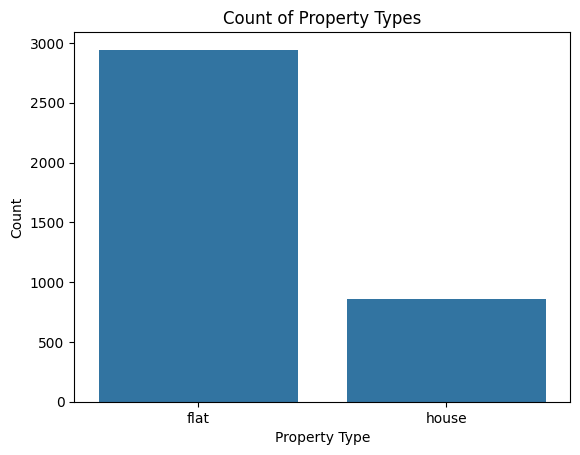

In [ ]:
#Create a bar plot for the property_type column
sns.barplot(x=df['property_type'].value_counts().index, y=df['property_type'].value_counts().values)

#Title and Labels
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')

# Display the plot
plt.show()


## Column: Society

In [ ]:
#Nature of the column
df['society'].describe()

count            3802
unique            676
top       independent
freq              486
Name: society, dtype: object

In [ ]:
#Any missing values
df['society'].isnull().sum()

1

In [ ]:
#Count of values in the column
society_count = df['society'].value_counts()
print(society_count)

society
independent                               486
tulip violet                               75
ss the leaf                                74
shapoorji pallonji joyville gurugram       45
dlf new town heights                       42
                                         ... 
samadhan shri kamal cghs                    1
private house                               1
elevate                                     1
dlf pink town house                         1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64


In [ ]:
# Remove rows with 'independent' in the 'society' column
df = df[df['society'] != 'independent']

# Count occurrences of each society after filtering
count = df['society'].value_counts()
print(count)

society
tulip violet                              75
ss the leaf                               74
shapoorji pallonji joyville gurugram      45
dlf new town heights                      42
signature global park                     37
                                          ..
samadhan shri kamal cghs                   1
private house                              1
elevate                                    1
dlf pink town house                        1
surendra homes dayaindependentd colony     1
Name: count, Length: 675, dtype: int64


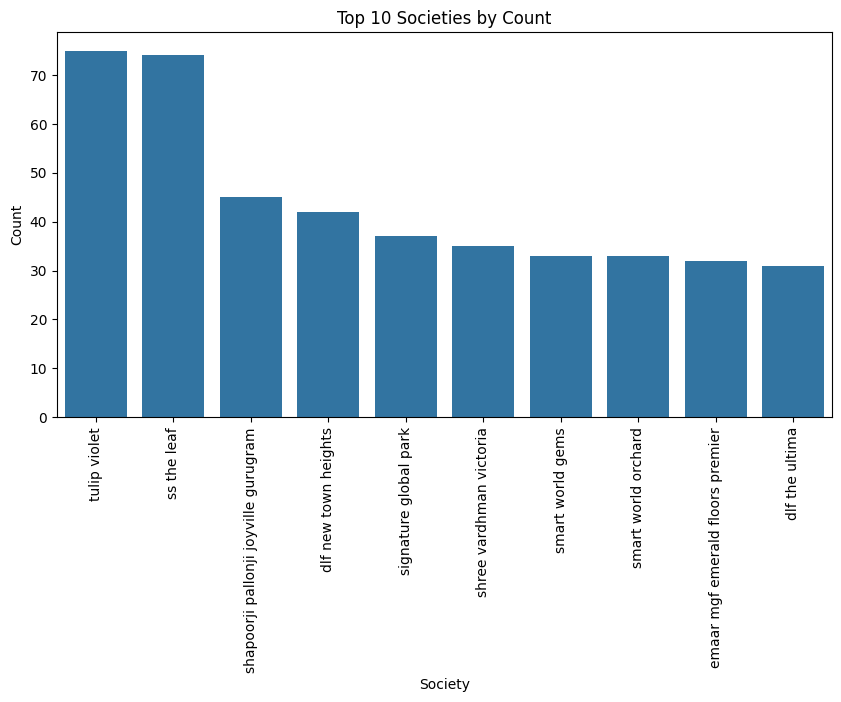

In [ ]:
# Extract top 10 societies
top_10_societies = count.head(10)

# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_societies.index, y=top_10_societies.values)

# Add title and labels
plt.title('Top 10 Societies by Count')
plt.xlabel('Society')
plt.ylabel('Count')

#For readability
plt.xticks(rotation=90)

plt.show()


In [ ]:
#Define bins based on frequency
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

frequency_bins = pd.cut(society_count, bins=bins)
print(frequency_bins)

#Printing the counts after binning
count = df['society'].value_counts()
frequency_counts, _ = np.histogram(count, bins=bins)

# Print the frequency counts
print("Frequency counts:", frequency_counts)

society
independent                                        NaN
tulip violet                              (70.0, 80.0]
ss the leaf                               (70.0, 80.0]
shapoorji pallonji joyville gurugram      (40.0, 50.0]
dlf new town heights                      (40.0, 50.0]
                                              ...     
samadhan shri kamal cghs                   (0.0, 10.0]
private house                              (0.0, 10.0]
elevate                                    (0.0, 10.0]
dlf pink town house                        (0.0, 10.0]
surendra homes dayaindependentd colony     (0.0, 10.0]
Name: count, Length: 676, dtype: category
Categories (8, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] <
                                         (50, 60] < (60, 70] < (70, 80]]
Frequency counts: [576  67  19   9   2   0   0   2]


## Column: Sector

In [ ]:
#Nature of the column
df['sector'].describe()

count           3317
unique           102
top       sohna road
freq             166
Name: sector, dtype: object

In [ ]:
#Any missing values
df['sector'].isnull().sum()

0

In [ ]:
#Count of values in the column
sector_count = df['sector'].value_counts()
print(sector_count)

sector
sohna road    166
sector 102    113
sector 85     110
sector 92     104
sector 69      93
             ... 
sector 88       3
sector 46       2
sector 40       2
sector 23       2
sector 13       1
Name: count, Length: 102, dtype: int64


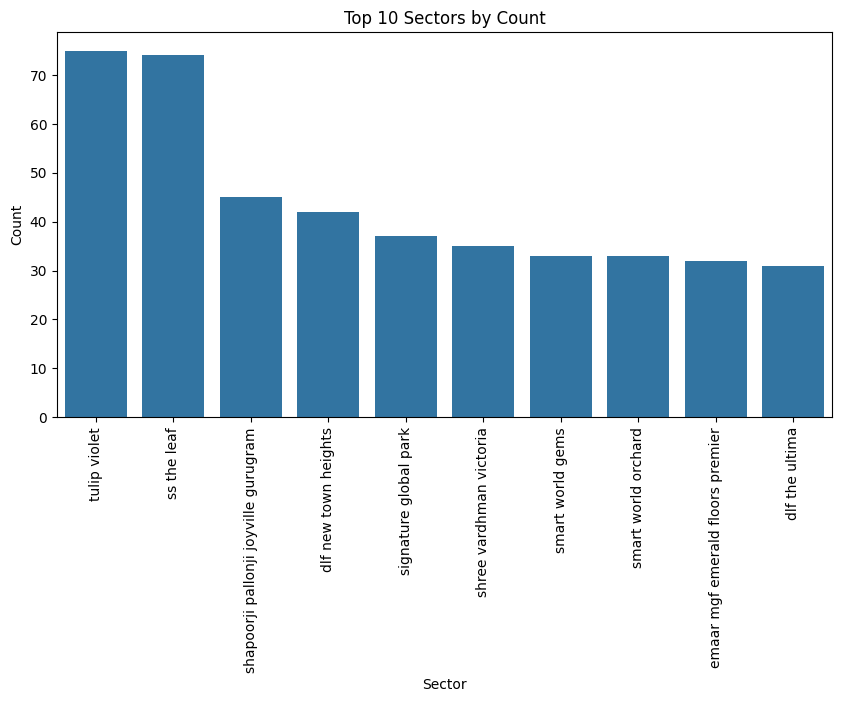

In [ ]:
#Extract top 10 sectors with respect to the number of flats or houses
top_10_sectors = count.head(10)

#Creating a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_sectors.index, y=top_10_sectors.values)

plt.title('Top 10 Sectors by Count')
plt.xlabel('Sector')
plt.ylabel('Count')

#For readability
plt.xticks(rotation=90)

plt.show()

In [ ]:
#Defining bins based on frequency
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]

#Using pd.cut() to bin the frequency counts
frequency_bins = pd.cut(sector_count, bins=bins)

print(frequency_bins)


sector
sohna road    (100, 200]
sector 102    (100, 200]
sector 85     (100, 200]
sector 92     (100, 200]
sector 69      (90, 100]
                 ...    
sector 88        (0, 10]
sector 46        (0, 10]
sector 40        (0, 10]
sector 23        (0, 10]
sector 13        (0, 10]
Name: count, Length: 102, dtype: category
Categories (11, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (70, 80] <
                                          (80, 90] < (90, 100] < (100, 200]]


## Column: Price

In [ ]:
#Nature of the column
df['price'].describe()

count    3304.000000
mean        2.223284
std         2.552565
min         0.160000
25%         0.920000
50%         1.450000
75%         2.350000
max        31.500000
Name: price, dtype: float64

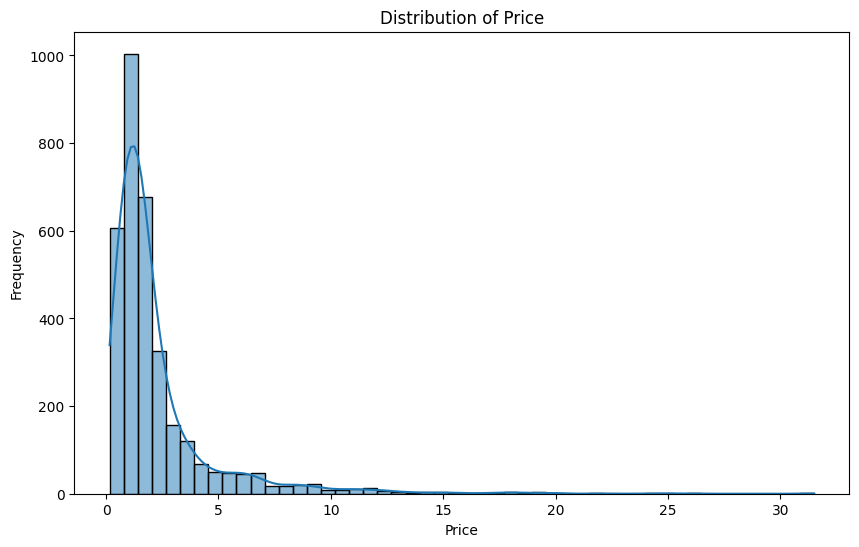

In [ ]:
#Creating a histogram for the price column
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)

plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

p,, inlt.show()

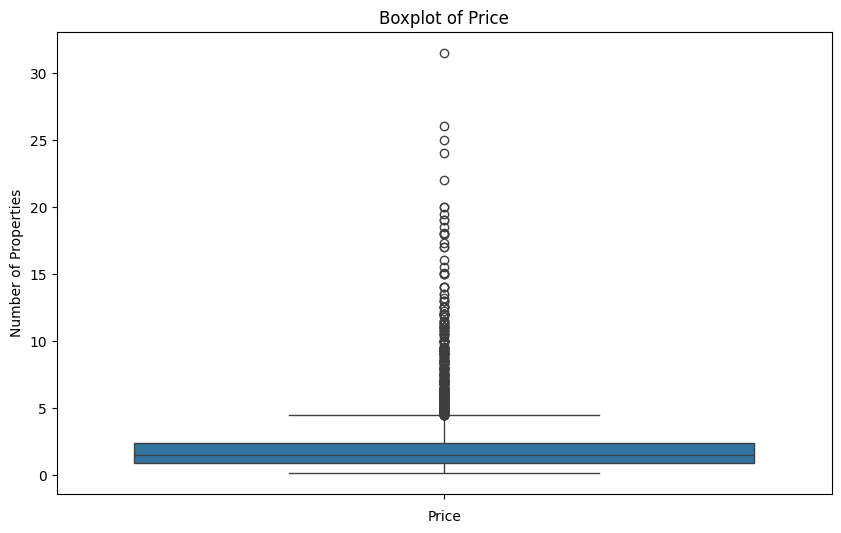

In [ ]:
#Creating a boxplot for the price column
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])

plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.ylabel('Number of Properties')
plt.show()

In [ ]:
#Any Missing Values
df['price'].isnull().sum()

13

In [ ]:
#Finding the Skewness and Kurtosis
print("Skewness:", df['price'].skew())
print("Kurtosis:", df['price'].kurtosis())

Skewness: 3.803469637490276
Kurtosis: 21.377596968556386


In [ ]:
#Counting values greater than 5 in the 'price' column
counts = (df['price'] > 5).sum()
print(counts)

#The value is about 11% of the total number of rows
#This will be later accounted in outliers detection and handling

299


In [ ]:
#Applying Price Binning
#Limiting the binning to the value 5
prices = df['price']
bins = pd.cut(df['price'], bins=6)

print(bins)

0        (0.129, 5.383]
1        (0.129, 5.383]
2        (0.129, 5.383]
3        (0.129, 5.383]
4        (0.129, 5.383]
             ...       
3797     (0.129, 5.383]
3798     (0.129, 5.383]
3799    (5.383, 10.607]
3800     (0.129, 5.383]
3802     (0.129, 5.383]
Name: price, Length: 3317, dtype: category
Categories (6, interval[float64, right]): [(0.129, 5.383] < (5.383, 10.607] < (10.607, 15.83] <
                                           (15.83, 21.053] < (21.053, 26.277] < (26.277, 31.5]]


## Column: Price_per_sqft

In [ ]:
#Nature of the column
df['price_per_sqft'].describe()

count      3304.000000
mean      11990.838680
std       20506.594326
min           4.000000
25%        6655.000000
50%        8615.000000
75%       12237.250000
max      600000.000000
Name: price_per_sqft, dtype: float64

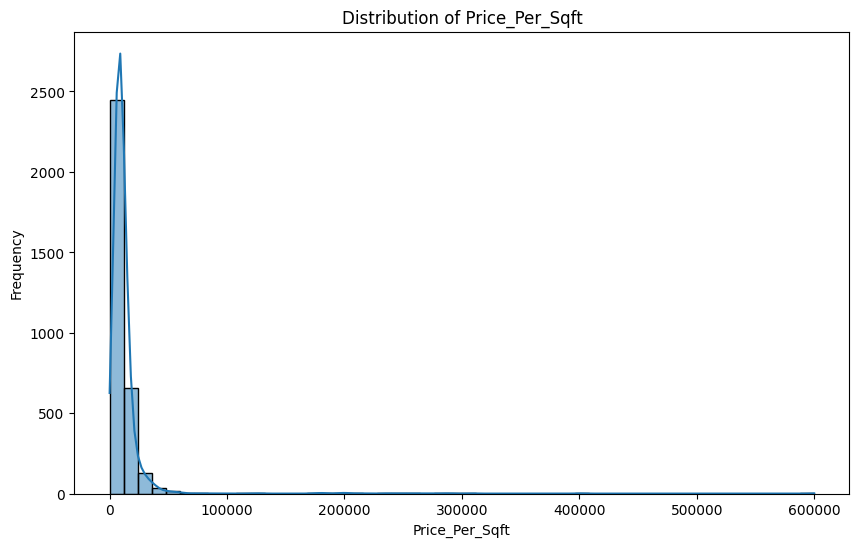

In [ ]:
#Creating a histogram for the price_per_sqft column
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True, bins=50)

plt.title('Distribution of Price_Per_Sqft')
plt.xlabel('Price_Per_Sqft')
plt.ylabel('Frequency')

plt.show()

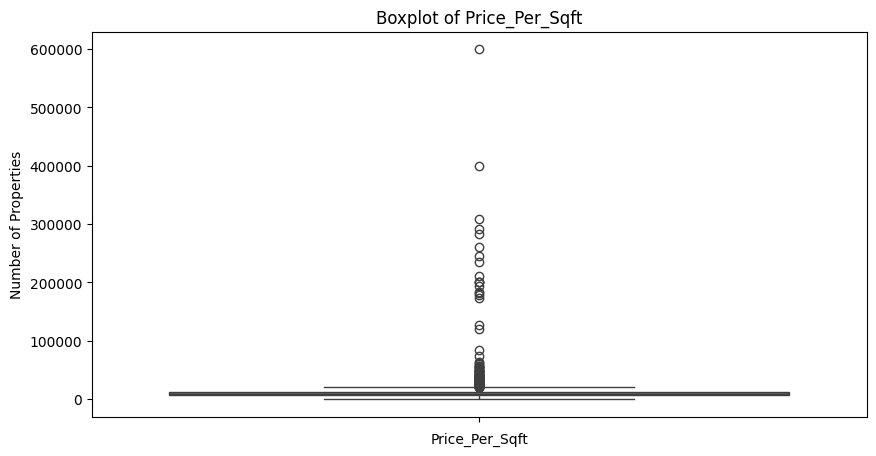

In [ ]:
#Creating a boxplot for the price_per_sqft column
plt.figure(figsize=(10, 5))
sns.boxplot(df['price_per_sqft'])

plt.title('Boxplot of Price_Per_Sqft')
plt.xlabel('Price_Per_Sqft')
plt.ylabel('Number of Properties')
plt.show()

In [ ]:
#Any missing values
df['price_per_sqft'].isnull().sum()

13

In [ ]:
#Replacing those missing values with median value
#Since the data is not normally distributed, it is better to replace missing values with Median
#More robust to outliers

df['price_per_sqft'].fillna(df['price_per_sqft'].median(), inplace=True)

In [ ]:
#Finding the Skewness and Kurtosis
print("Skewness:", df['price_per_sqft'].skew())
print("Kurtosis:", df['price_per_sqft'].kurtosis())

Skewness: 15.044083789133715
Kurtosis: 308.24993614415246


## Code: Area

In [ ]:
#Nature of the column
df['area'].describe()

count      3304.000000
mean       2848.195823
std       24018.439296
min          50.000000
25%        1258.750000
50%        1725.000000
75%        2244.000000
max      875000.000000
Name: area, dtype: float64

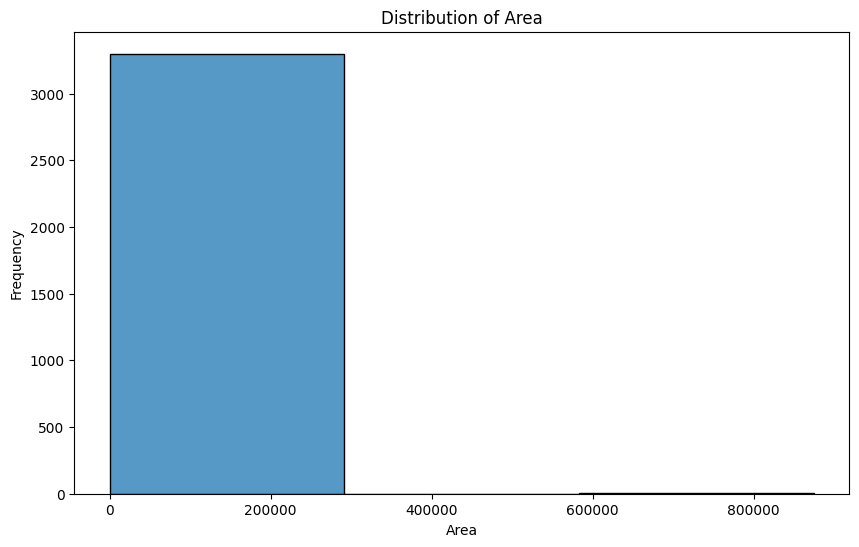

In [ ]:
#Creating a histogram for the Area column
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=3)

plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#Any missing values
df['area'].isnull().sum()

13

## Column: AreaWithType

In [ ]:
#Nature of the column
df['areaWithType'].describe()

count                            3317
unique                           2121
top       Plot area 360(301.01 sq.m.)
freq                               20
Name: areaWithType, dtype: object

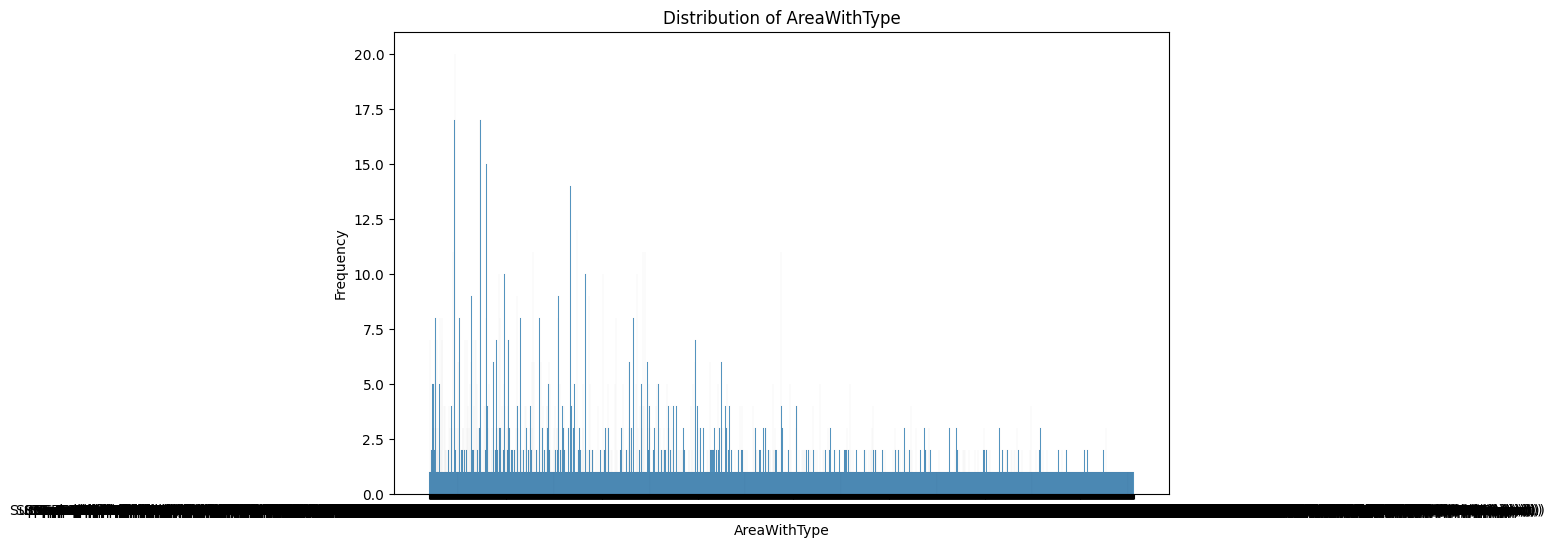

In [ ]:
#Creating a histogram for the AreaWithType column
plt.figure(figsize=(10, 6))
sns.histplot(df['areaWithType'], bins=3000)

plt.title('Distribution of AreaWithType')
plt.xlabel('AreaWithType')
plt.ylabel('Frequency')

plt.show()

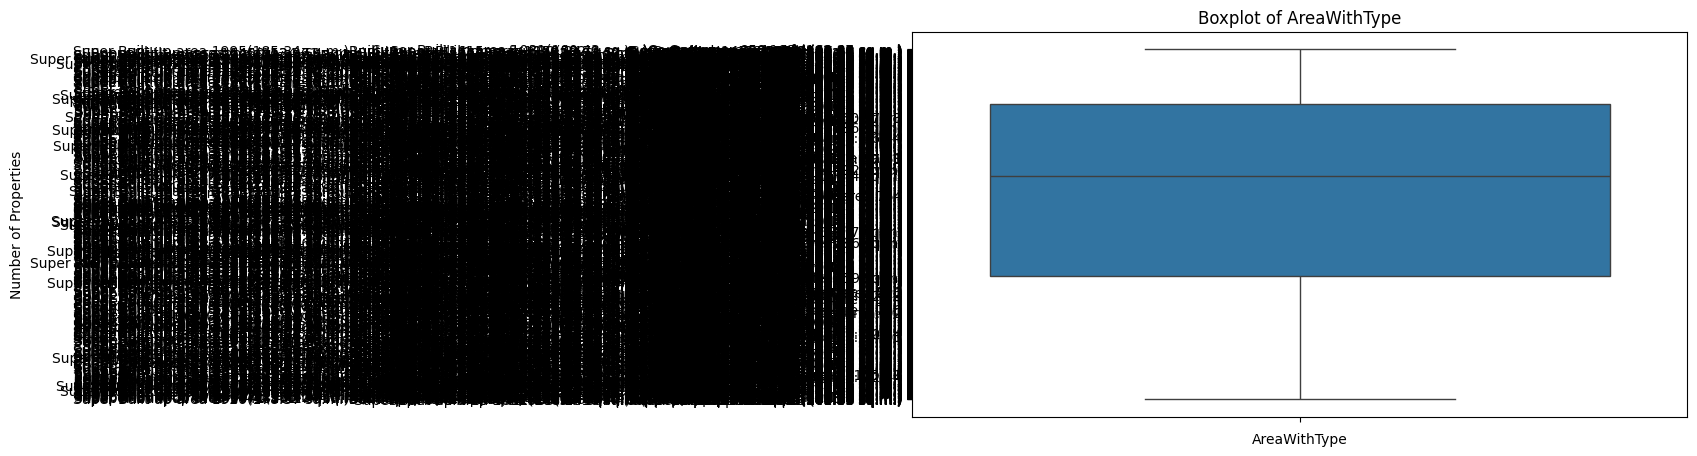

In [ ]:
#Creating a boxplot for the AreaWithType Column
plt.figure(figsize=(10, 5))
sns.boxplot(df['areaWithType'])

plt.title('Boxplot of AreaWithType')
plt.xlabel('AreaWithType')
plt.ylabel('Number of Properties')
plt.show()

In [ ]:
#Any missing values
df['areaWithType'].isnull().sum()

0

## Column: Super_Built_Up_Area

In [ ]:
#Nature of the column
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

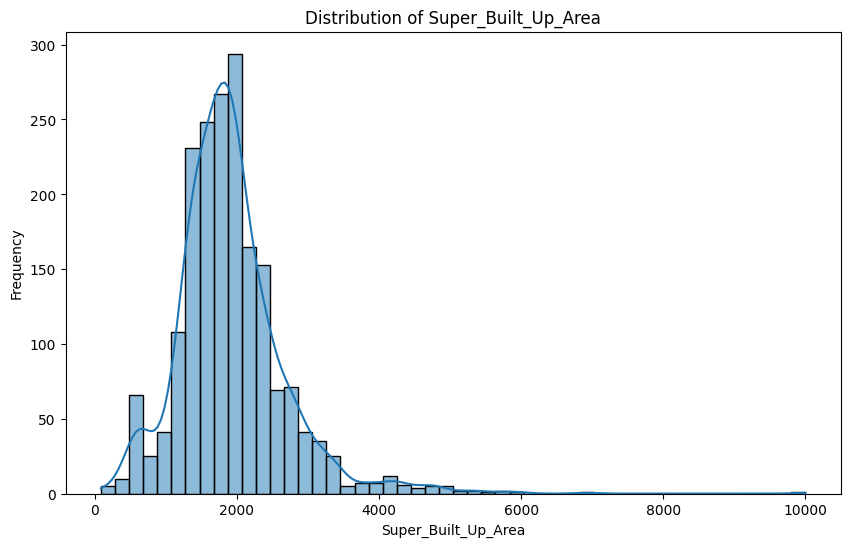

In [ ]:
#Creating a histogram for the Super_Built_Up_Area column
plt.figure(figsize=(10, 6))
sns.histplot(df['super_built_up_area'], kde=True, bins=50)

plt.title('Distribution of Super_Built_Up_Area')
plt.xlabel('Super_Built_Up_Area')
plt.ylabel('Frequency')

plt.show()

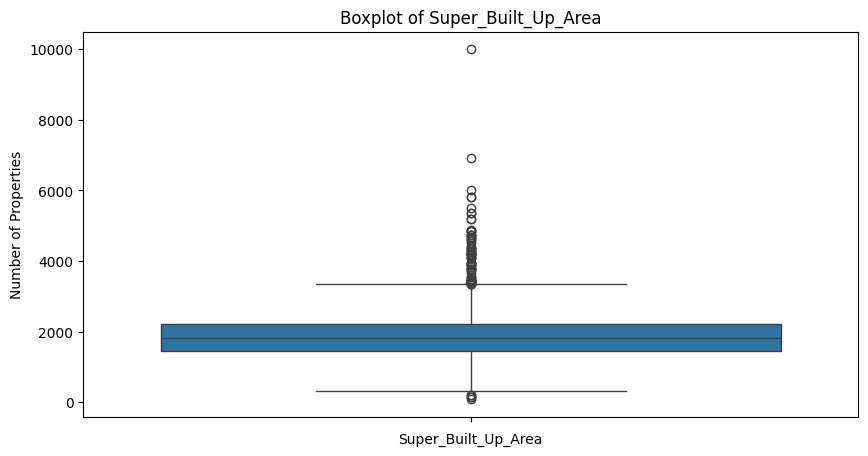

In [ ]:
#Creating a boxplot for the Super_Built_Up_Area Column
plt.figure(figsize=(10, 5))
sns.boxplot(df['super_built_up_area'])

plt.title('Boxplot of Super_Built_Up_Area')
plt.xlabel('Super_Built_Up_Area')
plt.ylabel('Number of Properties')
plt.show()

In [ ]:
#Any missing values
df['super_built_up_area'].isnull().sum()

1402

## Column: Built_Up_Area

In [ ]:
#Nature of the column
df['built_up_area'].describe()

count      1280.000000
mean       2539.449304
std       20592.684522
min          30.000000
25%        1218.565868
50%        1671.000000
75%        2300.000000
max      737147.000000
Name: built_up_area, dtype: float64

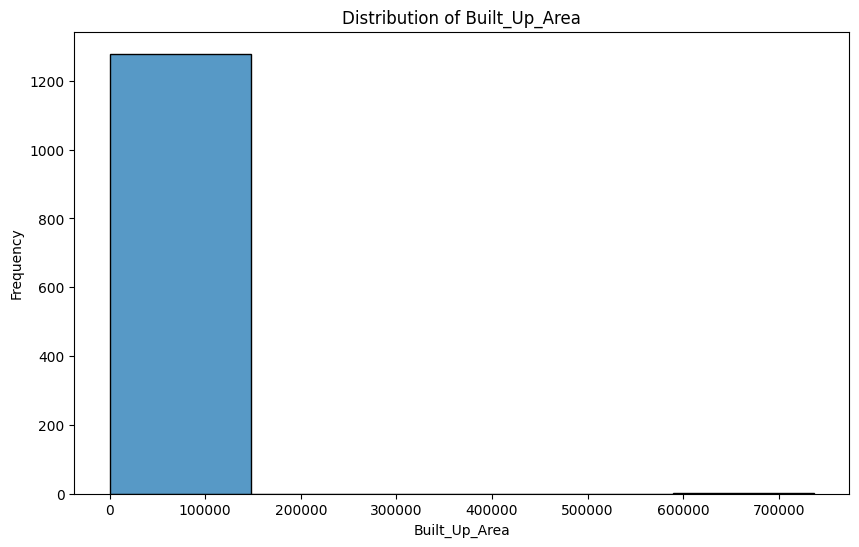

In [ ]:
#Creating a histogram for the Built_Up_Area column
plt.figure(figsize=(10, 6))
sns.histplot(df['built_up_area'],bins=5)

plt.title('Distribution of Built_Up_Area')
plt.xlabel('Built_Up_Area')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#Any missing values
df['built_up_area'].isnull().sum()

2037

## Column: Carpet_Area

In [ ]:
#Nature of the column
df['carpet_area'].describe()

count      1856.000000
mean       2533.910958
std       22893.580605
min          15.000000
25%         861.477500
50%        1300.000000
75%        1784.250000
max      607936.000000
Name: carpet_area, dtype: float64

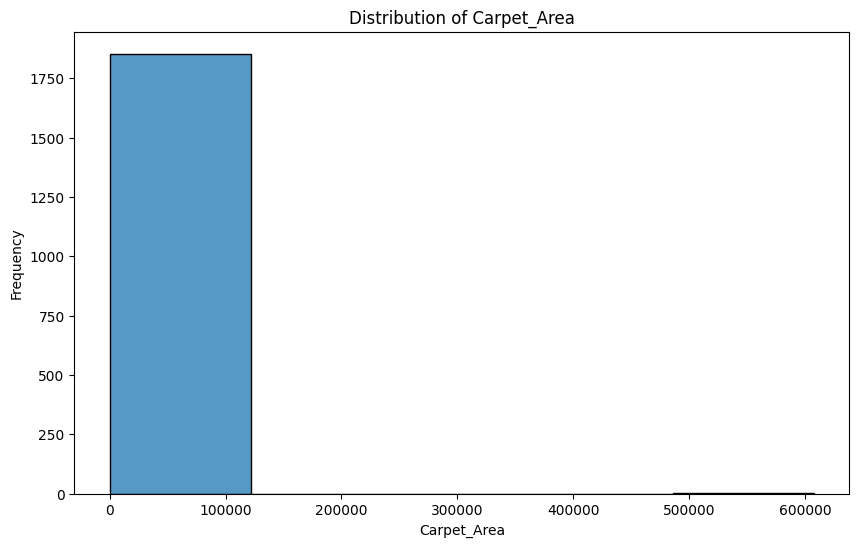

In [ ]:
#Creating a histogram for the Carpet_Area column
plt.figure(figsize=(10, 6))
sns.histplot(df['carpet_area'], bins=5)

plt.title('Distribution of Carpet_Area')
plt.xlabel('Carpet_Area')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#Any missing values
df['carpet_area'].isnull().sum()

1461

## Column: Bedroom

In [ ]:
#Nature of the column
df['bedRoom'].describe()

count    3317.000000
mean        3.045825
std         1.300811
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        18.000000
Name: bedRoom, dtype: float64

Text(0, 0.5, 'Frequency')

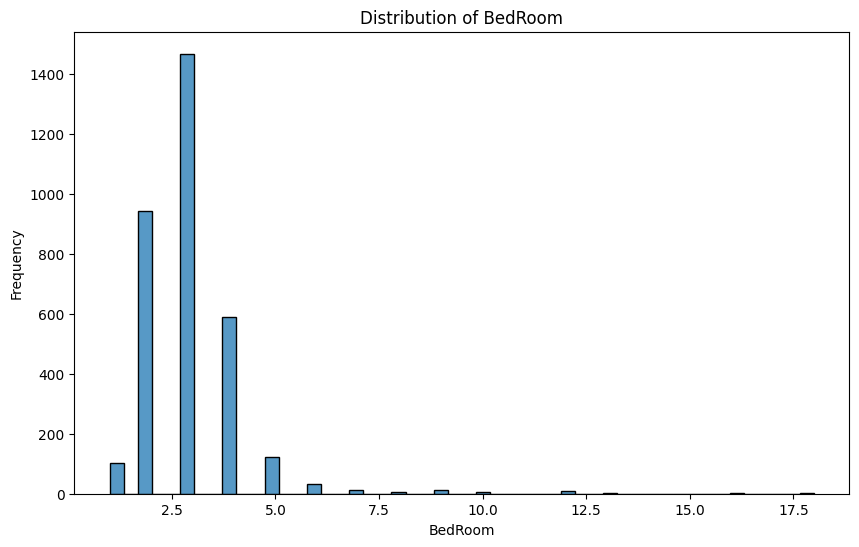

In [ ]:
#Creating a histogram for the bedRoom column
plt.figure(figsize=(10, 6))
sns.histplot(df['bedRoom'], bins=50)

plt.title('Distribution of BedRoom')
plt.xlabel('BedRoom')
plt.ylabel('Frequency')

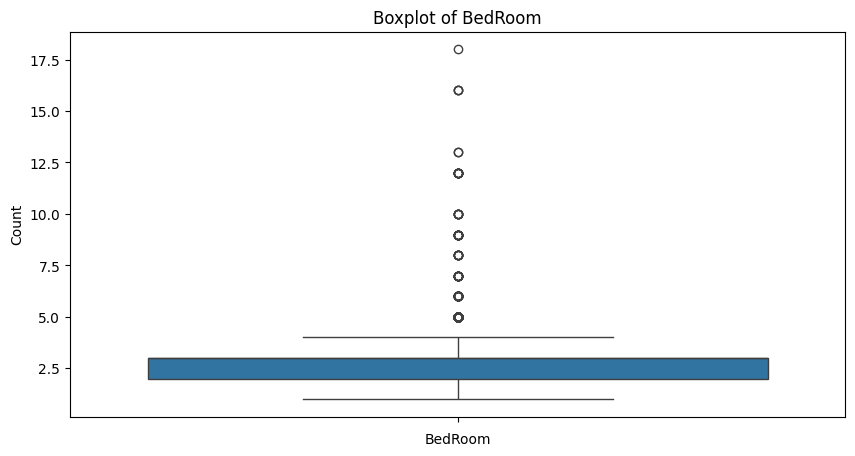

In [ ]:
#Creating a boxplot for the bedRoom column
plt.figure(figsize=(10, 5))
sns.boxplot(df['bedRoom'])

plt.title('Boxplot of BedRoom')
plt.xlabel('BedRoom')
plt.ylabel('Count')
plt.show()

In [ ]:
#Any missing values
df['bedRoom'].isnull().sum()

0

## Column: Bathroom

In [ ]:
#Nature of the column
df['bathroom'].describe()

count    3317.000000
mean        3.186011
std         1.464109
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: bathroom, dtype: float64

Text(0, 0.5, 'Frequency')

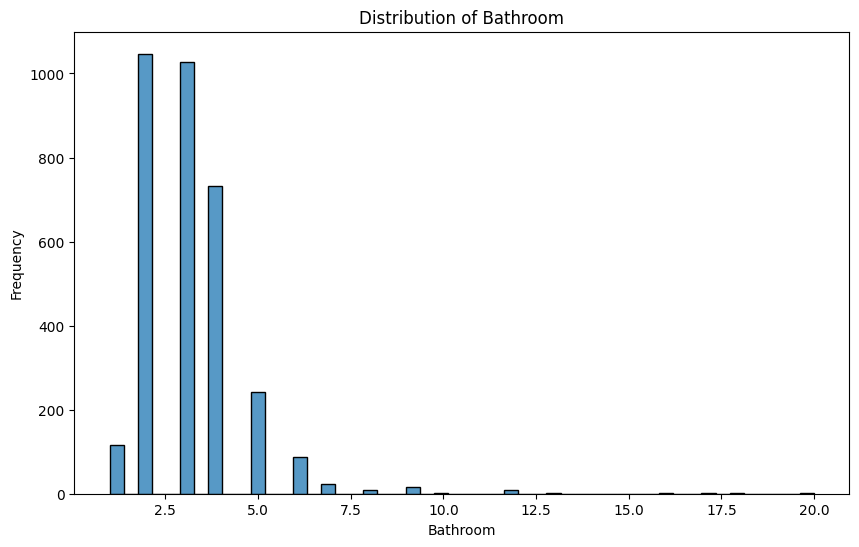

In [ ]:
#Creating a histogram for the bathroom column
plt.figure(figsize=(10, 6))
sns.histplot(df['bathroom'], bins=50)

plt.title('Distribution of Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Frequency')

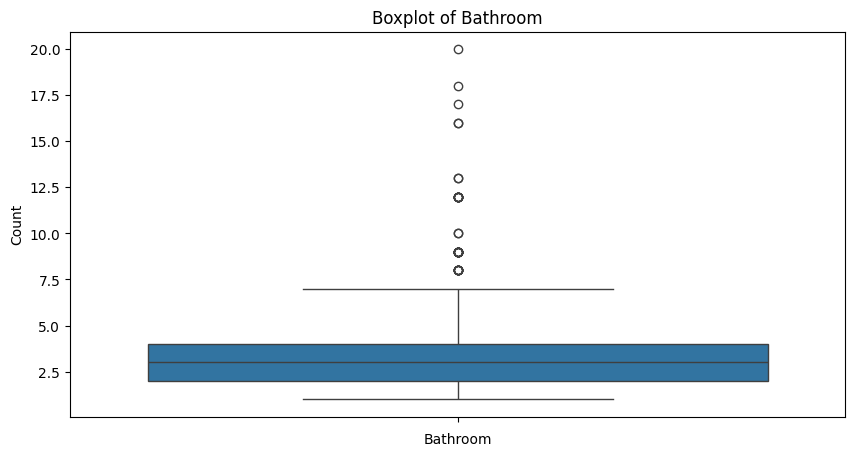

In [ ]:
#Creating a boxplot for the bathroom column
plt.figure(figsize=(10, 5))
sns.boxplot(df['bathroom'])

plt.title('Boxplot of Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Count')
plt.show()

In [ ]:
#Any missing values
df['bathroom'].isnull().sum()

0

## Column: Balcony

In [ ]:
#Nature of the column
df['balcony'].describe()

count     3317
unique       5
top          3
freq      1043
Name: balcony, dtype: object

Text(0, 0.5, 'Frequency')

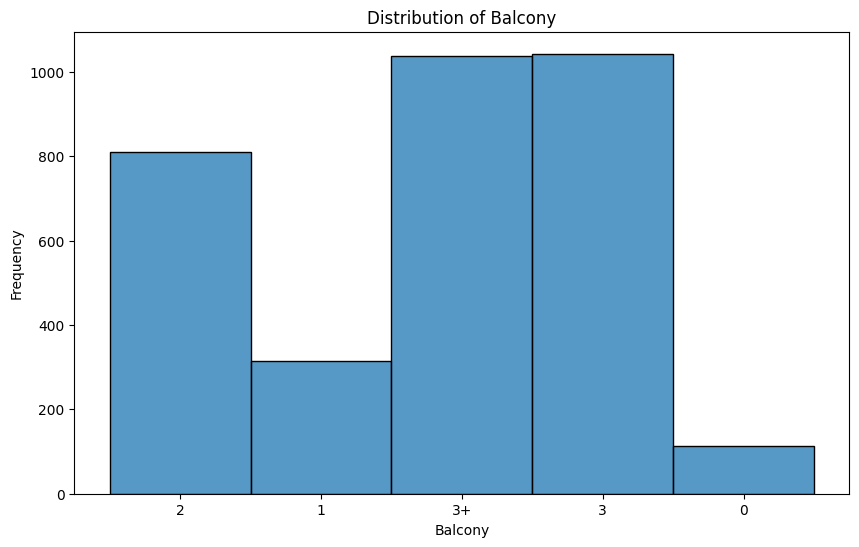

In [ ]:
#Creating a histogram for the balcony column
plt.figure(figsize=(10, 6))
sns.histplot(df['balcony'].sort_index())

plt.title('Distribution of Balcony')
plt.xlabel('Balcony')
plt.ylabel('Frequency')

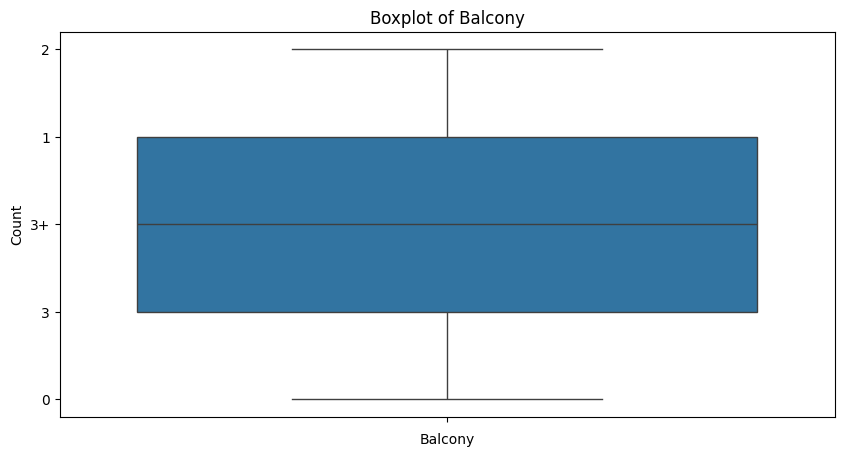

In [ ]:
#Creating a boxplot for the Balcony column
plt.figure(figsize=(10, 5))
sns.boxplot(df['balcony'])

plt.title('Boxplot of Balcony')
plt.xlabel('Balcony')
plt.ylabel('Count')
plt.show()

In [ ]:
#Any missing values
df['balcony'].isnull().sum()

0

## Column: FloorNum

In [ ]:
#Nature of the column
df['floorNum'].describe()

count    3307.000000
mean        7.436952
std         6.183609
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        51.000000
Name: floorNum, dtype: float64

Text(0, 0.5, 'Frequency')

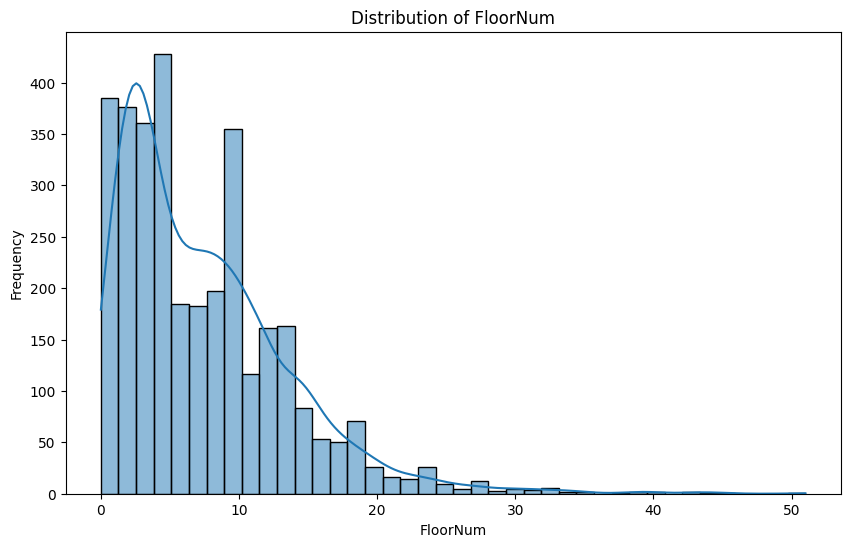

In [ ]:
#Creating a histogram for the FloorNum column
plt.figure(figsize=(10, 6))
sns.histplot(df['floorNum'], kde=True, bins=40)

plt.title('Distribution of FloorNum')
plt.xlabel('FloorNum')
plt.ylabel('Frequency')

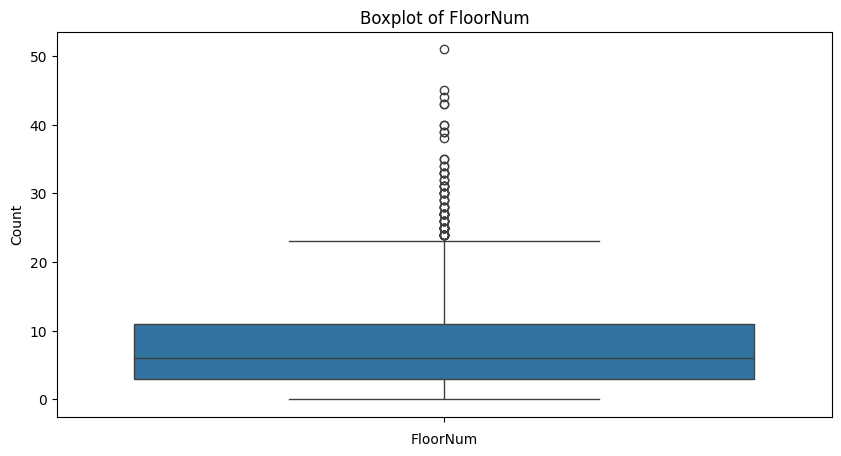

In [ ]:
#Creating a boxplot for the FloorNum column
plt.figure(figsize=(10, 5))
sns.boxplot(df['floorNum'])

plt.title('Boxplot of FloorNum')
plt.xlabel('FloorNum')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the Skewness and Kurtosis
print("Skewness:", df['floorNum'].skew())
print("Kurtosis:", df['floorNum'].kurtosis())

Skewness: 1.555300140408759
Kurtosis: 4.057507573101269


In [ ]:
#Any missing values
df['floorNum'].isnull().sum()

10

## Column: Facing

In [ ]:
#Nature of the column
df['facing'].describe()

count           2388
unique             8
top       North-East
freq             570
Name: facing, dtype: object

Text(0, 0.5, 'Frequency')

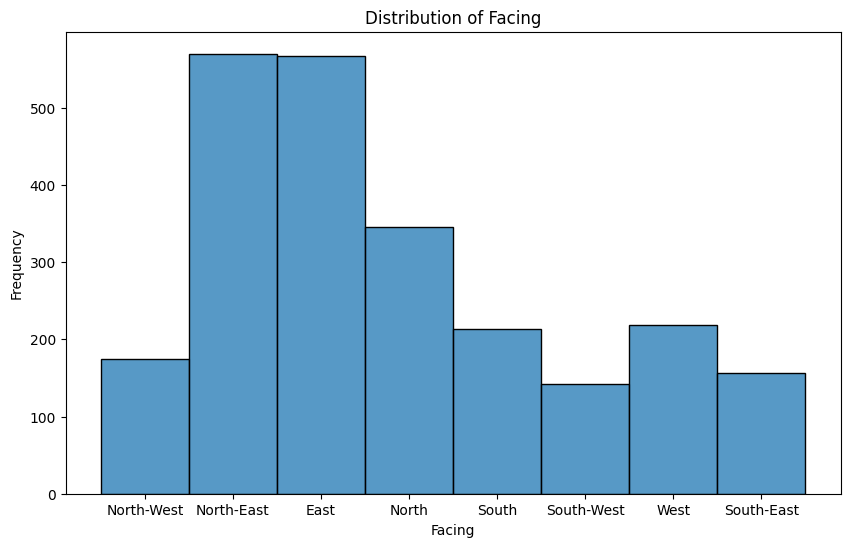

In [ ]:
#Creating a histogram for the Facing column
plt.figure(figsize=(10, 6))
sns.histplot(df['facing'], bins=50)

plt.title('Distribution of Facing')
plt.xlabel('Facing')
plt.ylabel('Frequency')

In [ ]:
#Any missing values
df['facing'].isnull().sum()

929

## Column: AgePossession

In [ ]:
#Nature of the column
df['agePossession'].describe()

count               3317
unique                 6
top       Relatively New
freq                1575
Name: agePossession, dtype: object

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Property'),
  Text(1, 0, 'Under Construction'),
  Text(2, 0, 'Relatively New'),
  Text(3, 0, 'Moderately Old'),
  Text(4, 0, 'Old Property'),
  Text(5, 0, 'Undefined')])

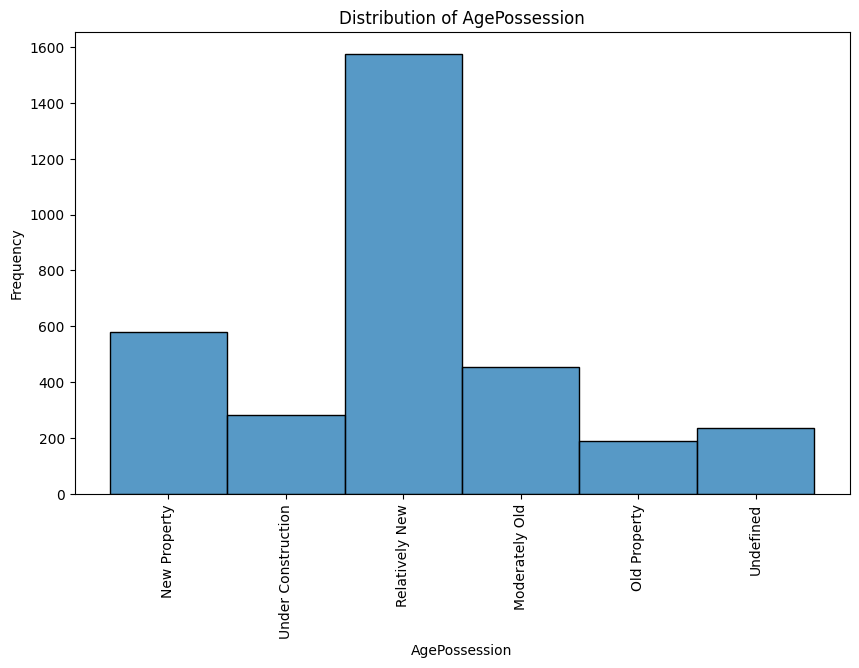

In [ ]:
#Creating a histogram for the AgePossession column
plt.figure(figsize=(10, 6))
sns.histplot(df['agePossession'], bins=50)

plt.title('Distribution of AgePossession')
plt.xlabel('AgePossession')
plt.ylabel('Frequency')

#For readability
plt.xticks(rotation=90)

In [ ]:
#Any missing values
df['agePossession'].isnull().sum()

0

## Analysis of Additional Rooms

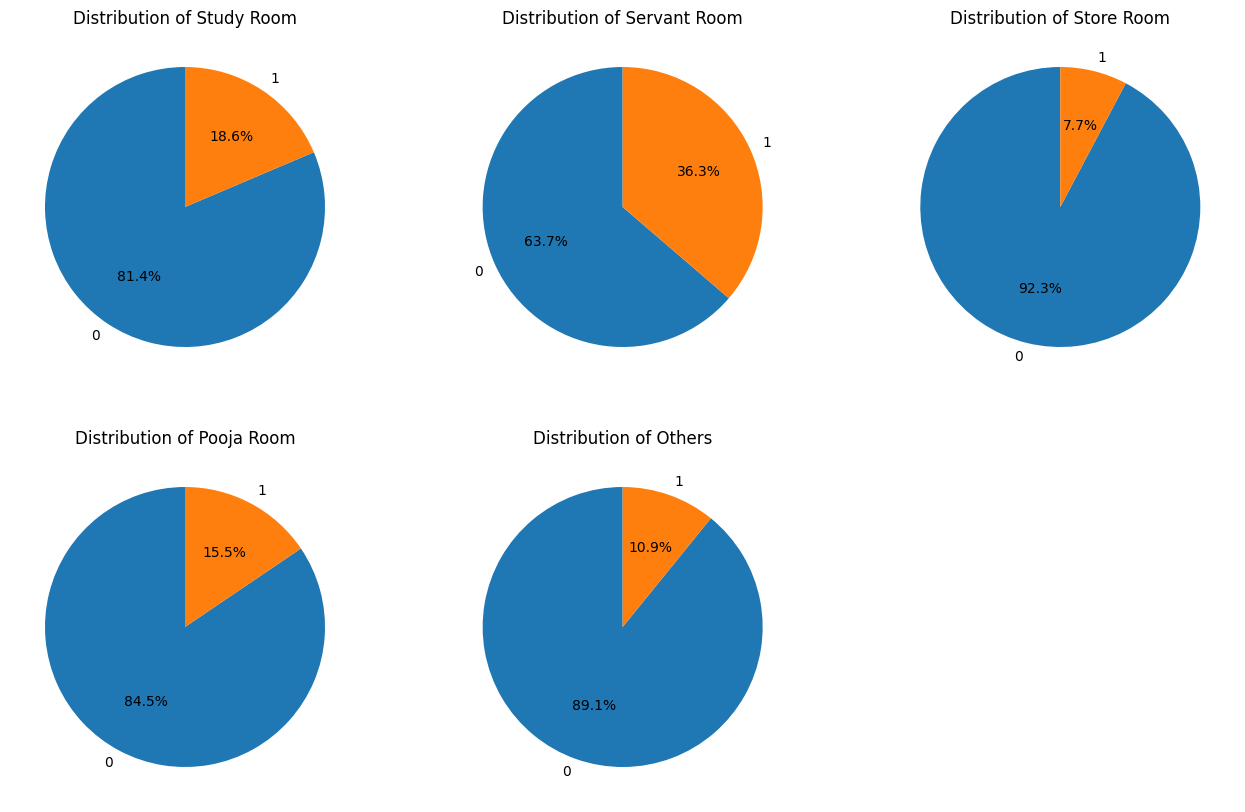

In [ ]:
plt.figure(figsize=(16, 10))

# Create pie charts for each room type
for idx, room in enumerate(['study room', 'servant room', 'store room', 'pooja room', 'others'], 1):
    plt.subplot(2, 3, idx)
    df[room].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.show()


## Column: Furnishing_Type

In [ ]:
#Nature of the column
df['furnishing_type'].describe()

count    3317.000000
mean        0.390112
std         0.589718
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: furnishing_type, dtype: float64

Text(0, 0.5, 'Frequency')

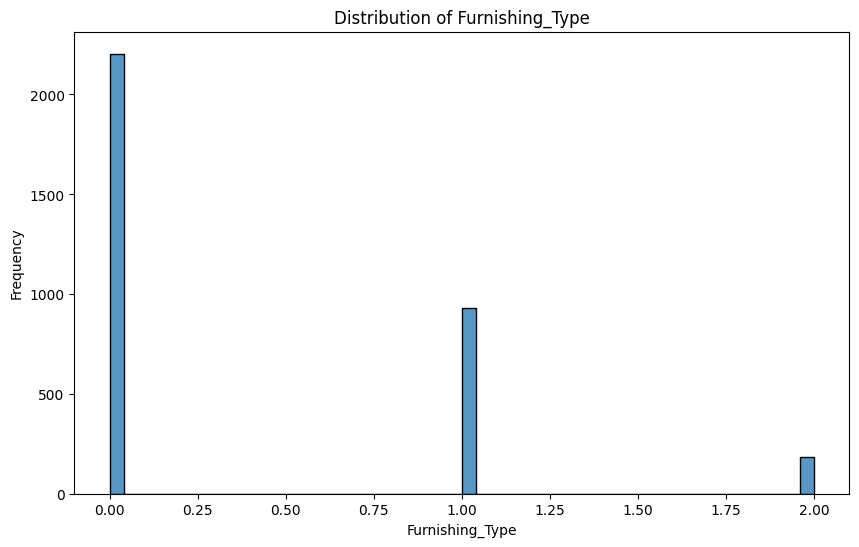

In [ ]:
#Creating a histogram for the Furnishing_Type column
plt.figure(figsize=(10, 6))
sns.histplot(df['furnishing_type'], bins=50)

plt.title('Distribution of Furnishing_Type')
plt.xlabel('Furnishing_Type')
plt.ylabel('Frequency')

In [ ]:
#Any missing values
df['furnishing_type'].isnull().sum()

0

## Column: Luxury_Score

In [ ]:
#Nature of the column
df['luxury_score'].describe()

count    3803.000000
mean       70.947936
std        52.821789
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

Text(0, 0.5, 'Frequency')

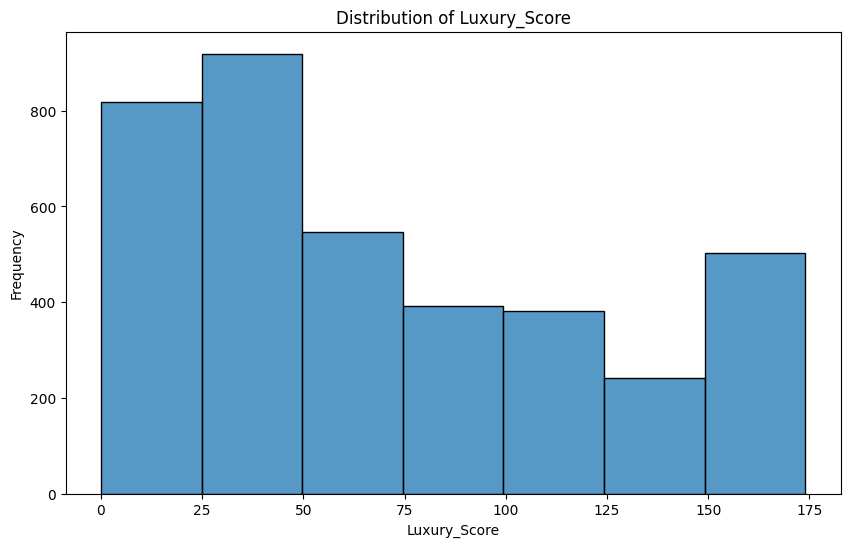

In [ ]:
#Creating a histogram for the Luxury_Score column
plt.figure(figsize=(10, 6))
sns.histplot(df['luxury_score'], bins=7)

plt.title('Distribution of Luxury_Score')
plt.xlabel('Luxury_Score')
plt.ylabel('Frequency')

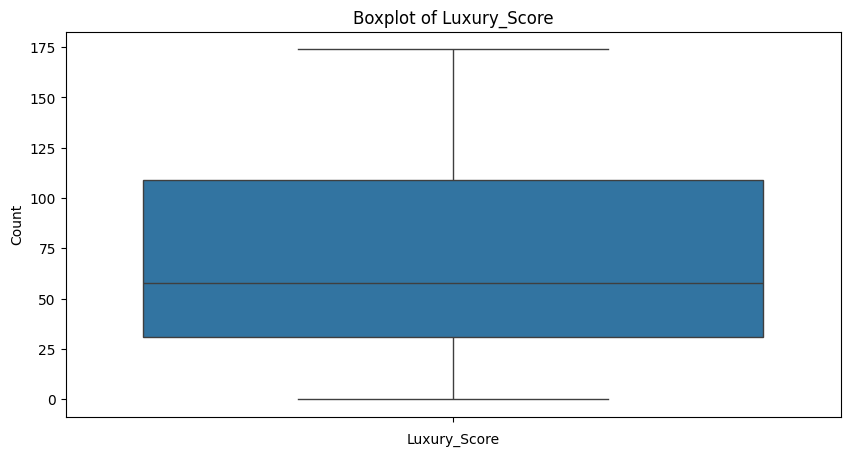

In [ ]:
#Creating a boxplot for the Luxury_Score column
plt.figure(figsize=(10, 5))
sns.boxplot(df['luxury_score'])

plt.title('Boxplot of Luxury_Score')
plt.xlabel('Luxury_Score')
plt.ylabel('Count')
plt.show()

In [ ]:
#Any missing values
df['luxury_score'].isnull().sum()

0

In [ ]:
# Define the data
data = df['luxury_score']

# Define the custom bin ranges
custom_bins = [0, 25, 50, 75, 100, 125, 150, 175]

# Get the frequency counts for each bin
frequency_counts, _ = np.histogram(data, bins=custom_bins)

# Print the frequency counts
print("Frequency counts:", frequency_counts)


Frequency counts: [551 814 493 370 362 232 495]


In [ ]:
#This column doesn't make much contribution for this dataset
#Hence it is better to remove it
df.drop(columns=['luxury_score'], inplace=True)

# Multivariate Comparisons

## Property_Type vs. Price

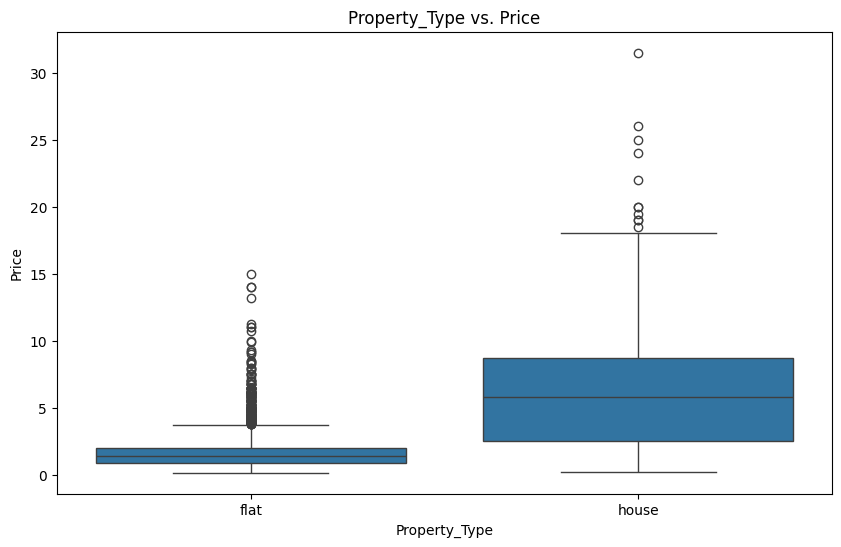

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['property_type'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Property_Type')
plt.title('Property_Type vs. Price')
plt.show()

## Sector vs. Price

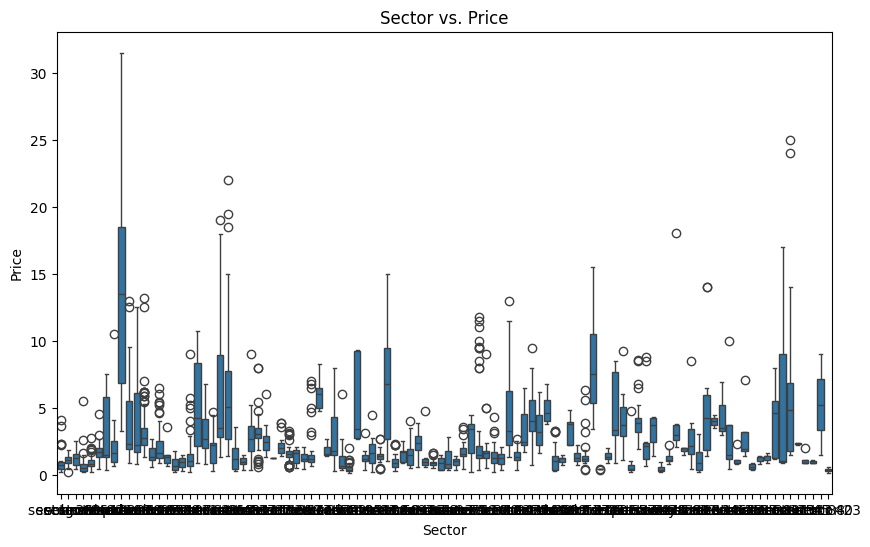

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['sector'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Sector')
plt.title('Sector vs. Price')
plt.show()

## Price_Per_Sqft vs. Price

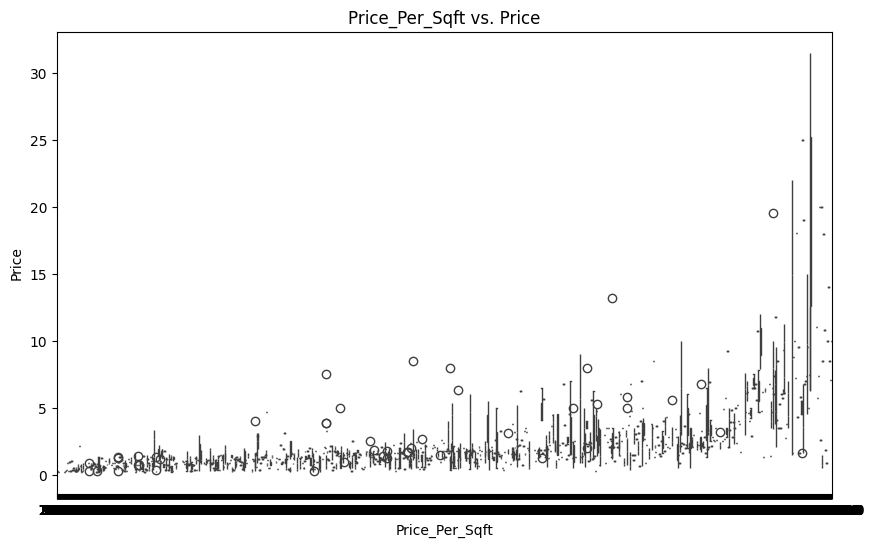

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['price_per_sqft'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Price_Per_Sqft')
plt.title('Price_Per_Sqft vs. Price')
plt.show()

## Society vs. Price

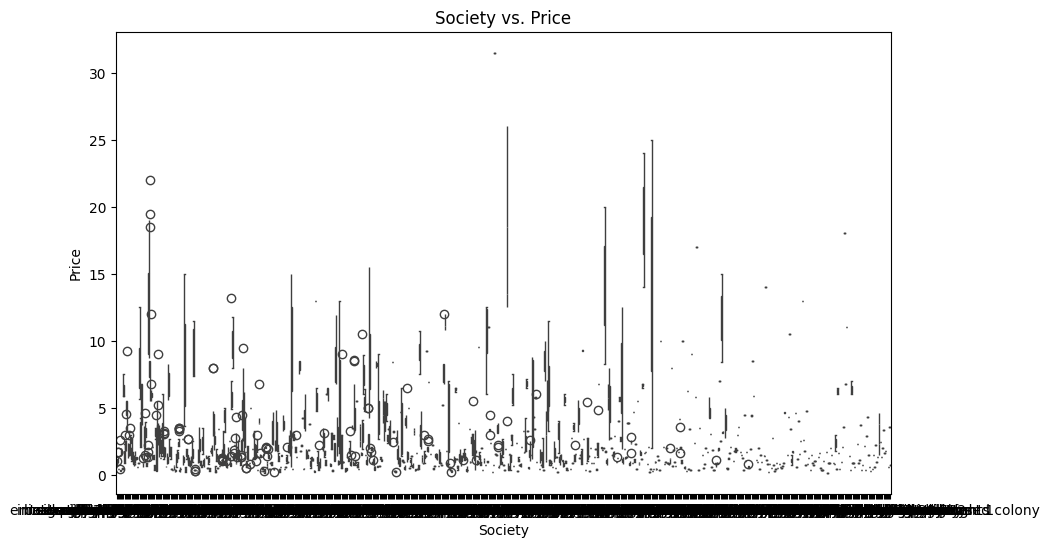

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['society'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Society')
plt.title('Society vs. Price')
plt.show()

## BedRoom vs. Price

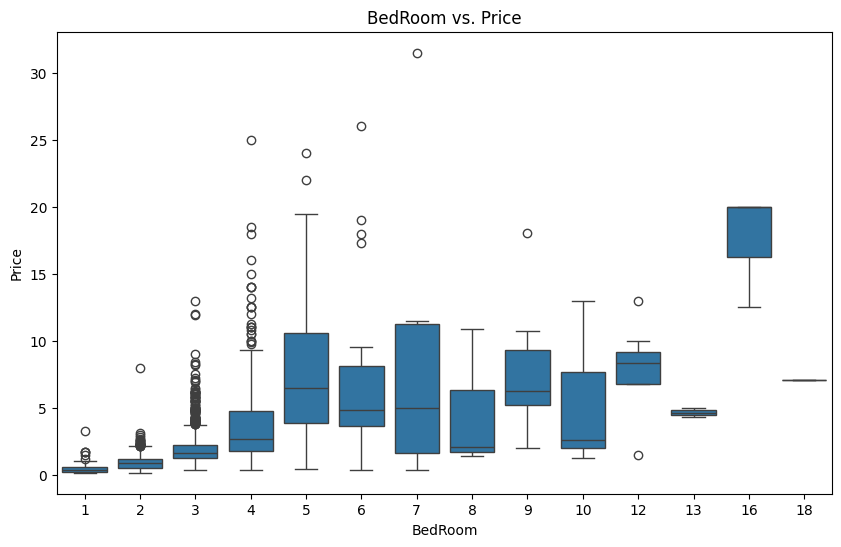

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['bedRoom'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('BedRoom')
plt.title('BedRoom vs. Price')
plt.show()

## Bathroom vs. Price

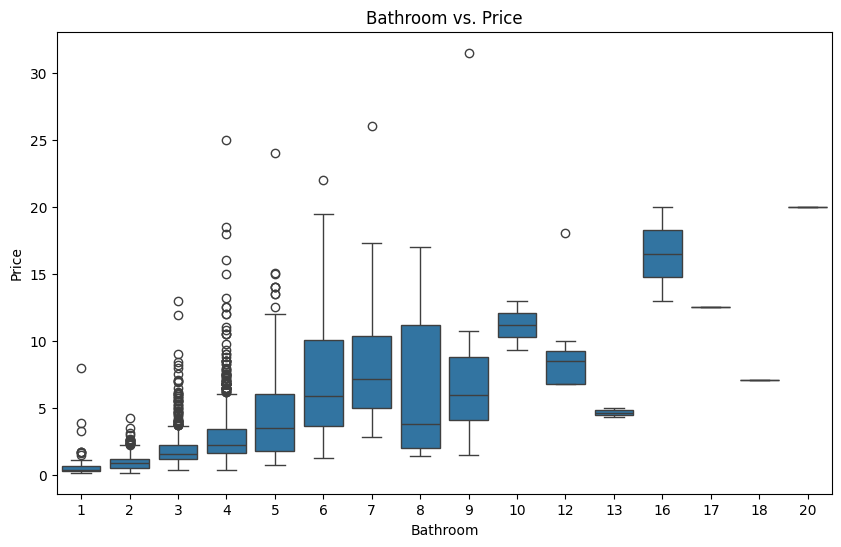

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['bathroom'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Bathroom')
plt.title('Bathroom vs. Price')
plt.show()

## Balcony vs. Price

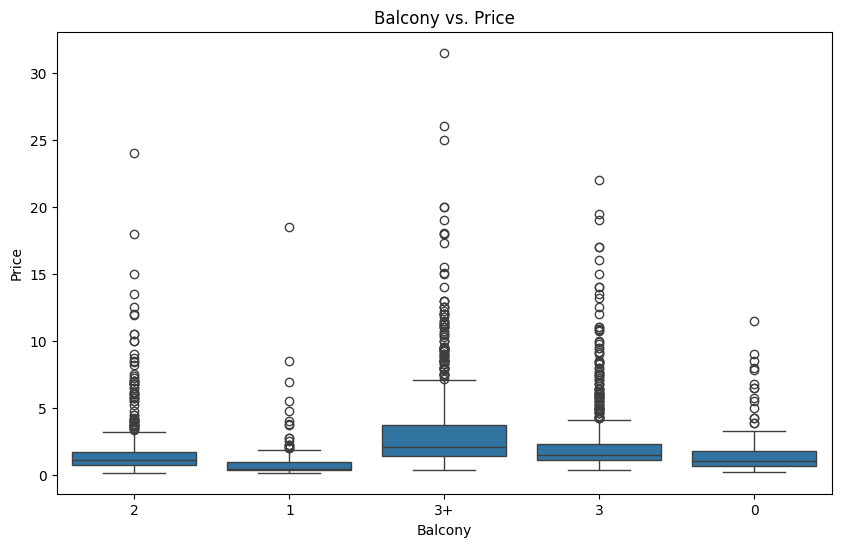

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['balcony'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Balcony')
plt.title('Balcony vs. Price')
plt.show()

## AgePossession vs. Price

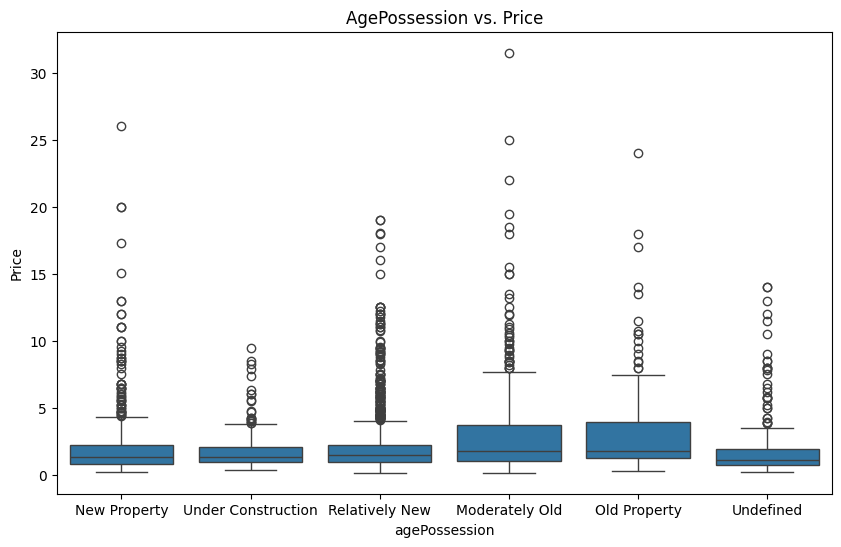

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['agePossession'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('agePossession')
plt.title('AgePossession vs. Price')
plt.show()

## Facing vs. Price

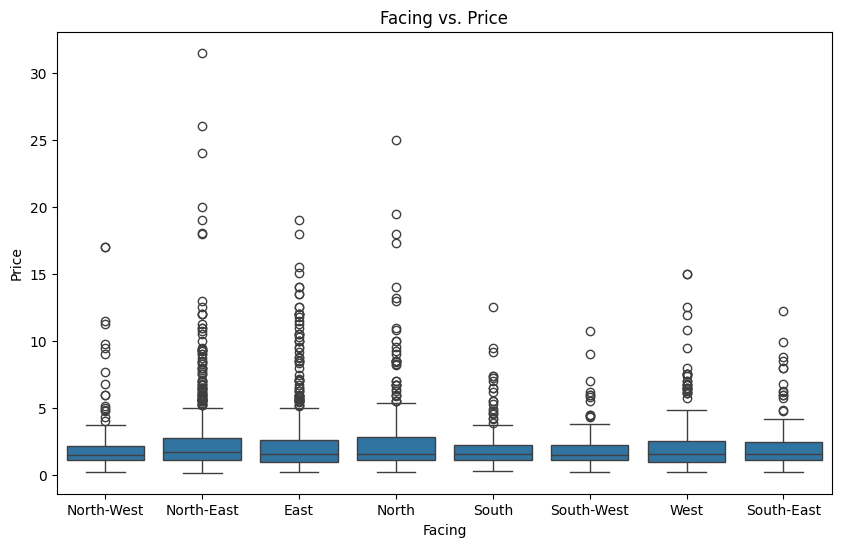

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['facing'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Facing')
plt.title('Facing vs. Price')
plt.show()

## Furnishing_Type vs. Price

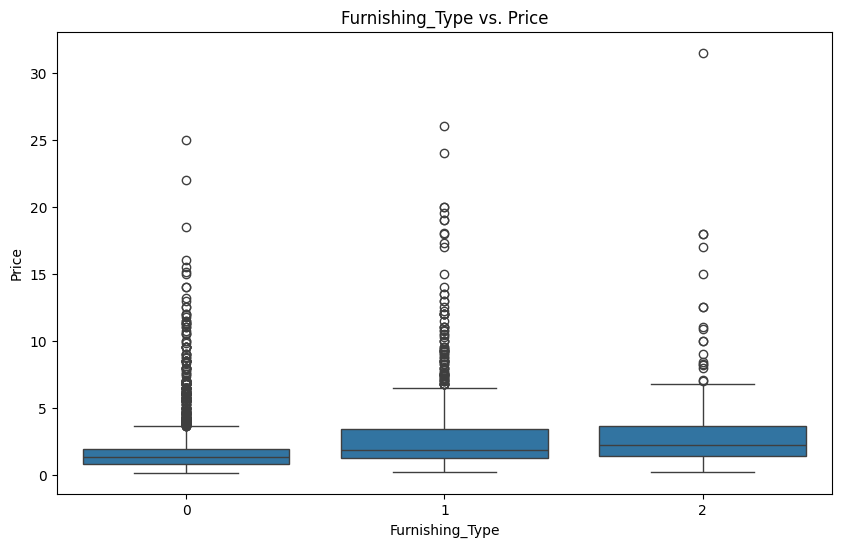

In [ ]:
#Boxplot
plt.figure(figsize= (10,6))
sns.boxplot(x=df['furnishing_type'], y=df['price'])

plt.ylabel('Price')
plt.xlabel('Furnishing_Type')
plt.title('Furnishing_Type vs. Price')
plt.show()

## Luxury_Score vs. Price

In [ ]:
# Check if the column exists before attempting to drop it
if 'luxury_score' in df.columns:
    df.drop(['luxury_score'], axis='columns', inplace=True)
    print(df.shape)
else:
    print("Column 'luxury_score' not found in the DataFrame.")

(3803, 22)


## Area vs. Price

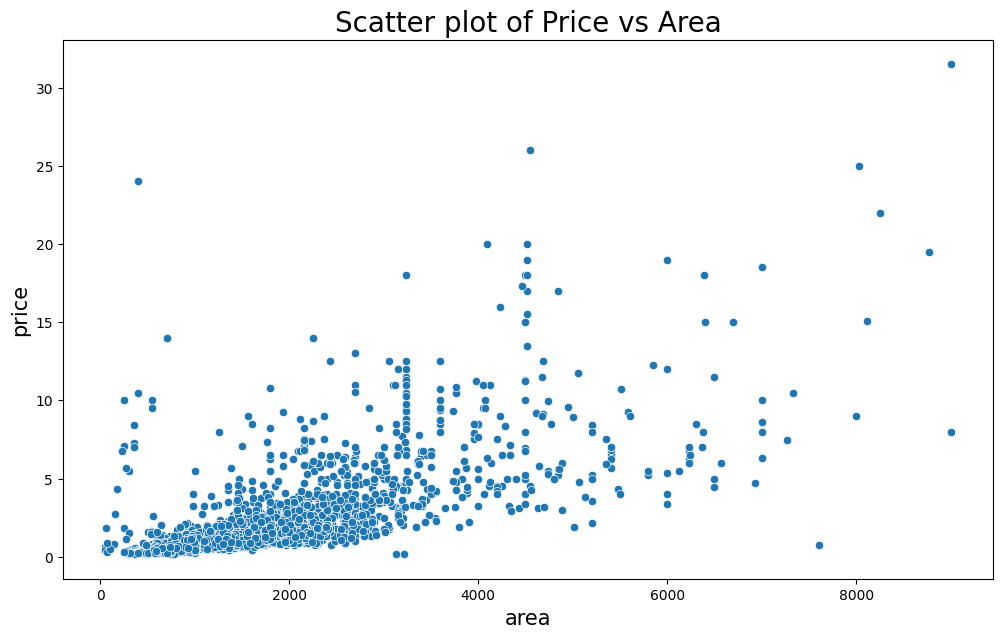

In [ ]:
#Scatter plot of price vs area

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price')


plt.ylabel('price', fontsize=15)
plt.xlabel('area', fontsize=15)
plt.title('Scatter plot of Price vs Area', fontsize=20)
plt.show()

# Task 2: Missing Values Handling

In [ ]:
#Checking for missing values
missing = df.isnull().sum()
print(missing)

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1105
agePossession             0
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
dtype: int64


<Axes: >

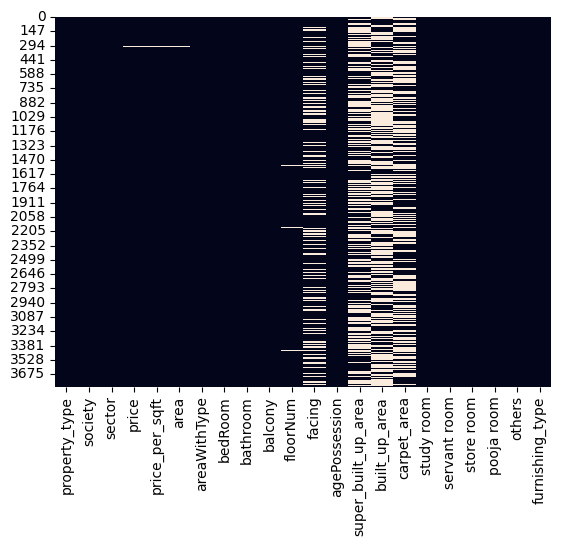

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

#Here we can see that the columns price, price_per_sqft, and area have correlation in how their missing data occur.
#Missing value in society column, doesn't make a huge difference.

## Column: Society

In [ ]:
#Number of missing values
df['society'].isnull().sum()

1

In [ ]:
#As only one missing value exist, it is better to delete that row containing missing value in society.
df.dropna(subset=['society'], inplace=True)
df['society'].isnull().sum()

0

## Column: Area

In [ ]:
#Number of missing values
df['area'].isnull().sum()

18

In [ ]:
#Nature of column
df['area'].describe()

count      3784.000000
mean       2846.322146
std       22786.351485
min          50.000000
25%        1220.000000
50%        1725.000000
75%        2295.000000
max      875000.000000
Name: area, dtype: float64

In [ ]:
# Assuming data is your DataFrame and the columns are named as specified
# Check for missing values in the 'area' column
missing_area = df['area'].isnull()

# Replace missing values in 'area' with corresponding values from 'built_up_area' if available,
# otherwise replace with 'carpet_area'
df.loc[missing_area, 'area'] = df.loc[missing_area, 'super_built_up_area'].combine_first(df.loc[missing_area, 'built_up_area']).combine_first(df.loc[missing_area, 'carpet_area'])

#Number of missing values
df['area'].isnull().sum()

0

## Column: Price_Per_Sqft

In [ ]:
#Number of missing values
df['price_per_sqft'].isnull().sum()

18

In [ ]:
#Nature of column
df['price_per_sqft'].describe()

count      3784.000000
mean      13802.839059
std       23054.466260
min           4.000000
25%        6810.250000
50%        9000.000000
75%       13766.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [ ]:
#We can replace the missing values with the price_per_sqft corresponding with the society
#Since, price_per_sqft doesn't change as the society remains the same

# Group by 'property_type', 'society', and 'sector' and calculate the mean of 'price_per_sqft'
mean_price_per_sqft = df.groupby(['property_type', 'society', 'sector'])['price_per_sqft'].mean()

# Iterate over the rows with missing 'price_per_sqft' values
for index, row in df[df['price_per_sqft'].isnull()].iterrows():
    # Extract the values of 'property_type', 'society', and 'sector' for the current row
    property_type = row['property_type']
    society = row['society']
    sector = row['sector']

    # Check if there is a corresponding mean value for the combination
    if (property_type, society, sector) in mean_price_per_sqft.index:
        # Replace the missing value with the mean value for the corresponding combination
        df.at[index, 'price_per_sqft'] = mean_price_per_sqft.loc[(property_type, society, sector)]

df['price_per_sqft'].isnull().sum()

3

In [ ]:
#Delete the remaining three rows
df.dropna(subset=['price_per_sqft'], inplace=True)
df['price_per_sqft'].isnull().sum()

0

## Column: Price

In [ ]:
#Number of missing values
df['price'].isnull().sum()

15

In [ ]:
#Nature of column
df['price'].describe()

count    3784.000000
mean        2.506308
std         2.950348
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

In [ ]:
# Calculate the product of 'price_per_sqft' and 'area'
product = df['price_per_sqft'] * df['area']

# Scale the product as the price is in crores
scaled_product = product / 10**7

# Replace missing values in 'price' column with scaled product
df['price'].fillna(scaled_product, inplace=True)

In [ ]:
#Number of missing values
df['price'].isnull().sum()

0

## Column: Built_Up_Area

In [ ]:
#Number of missing values
df['built_up_area'].isnull().sum()

2069

In [ ]:
#Nature of column
df['built_up_area'].describe()

count      1730.000000
mean       2360.366109
std       17734.773676
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2398.750000
max      737147.000000
Name: built_up_area, dtype: float64

In [ ]:
#Checking if all 3 values(built up, super built up and carpet areas) are missing

((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())).sum()

0

In [ ]:
#Storing all 3 values(built up, super built up and carpet areas) present in all_present_df

all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [ ]:
#Calculating the super TO builtup ratio and  carpet TO builtup ratio

super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

print(super_to_built_up_ratio)
print(carpet_to_built_up_ratio)

1.1048701298701298
0.900140056022409


In [ ]:
#1)Storing super_built_up_area & carpet_area is present , built_up_area is null to sbc_df

sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [ ]:
sbc_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,New Property,1081.0,NaN,650.0,0,0,0,0,0,0
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,Relatively New,632.0,NaN,532.0,0,0,1,0,0,0


In [ ]:
#Filling these values by using the ratio values of super_built_up_area & carpet_area

sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-31-4e16ad40dadb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [ ]:
#Updating it to the dataframe

df.update(sbc_df)

In [ ]:
#2)Storing super_built_up_area is present , but built_up_area & carpet_area is null in sb_df

sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [ ]:
sb_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
6,flat,paras quartier,gwal pahari,7.5,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,...,New Property,5350.0,NaN,NaN,0,1,0,1,1,1
7,flat,experion the heartsong,sector 108,2.0,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,...,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,0


In [ ]:
#Filling the values by using the ratio value of super_built_up_area

sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-35-1da7cd32784e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [ ]:
#Updating to dataframe

df.update(sb_df)

In [ ]:
#3)Storing carpet_area is present , but built_up_area & super_built_up_area is null in c_df

c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [ ]:
c_df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,New Property,NaN,NaN,1103.0,1,1,0,0,0,0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0


In [ ]:
#Filling the values by using the ratio value of carpet_area

c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-39-febe469aedd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [ ]:
#Updating to dataframe

df.update(c_df)

In [ ]:
#Filling the values by using the ratio value of carpet_area

c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-41-febe469aedd2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [ ]:
#Updating to dataframe

df.update(c_df)

In [ ]:
#Creating a dataframe for the anamoly records

anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [ ]:
#Replacing the area column values into the built_up_area column for anamolies

anamoly_df['built_up_area'] = anamoly_df['area']

In [ ]:
#Updating it to the main dataframe

df.update(anamoly_df)

In [ ]:
#Now dropping the unwanted columns

df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

## Column: Facing

In [ ]:
#Since, facing column doesn't make much of interest for the given dataset
#We will just remove this column
df.drop(columns=['facing'], inplace=True)

## Column: Floor_Num

In [ ]:
#Number of missing values
df['floorNum'].isnull().sum()

18

In [ ]:
#Nature of column
df['floorNum'].describe()

count    3781.000000
mean        6.810897
std         6.029070
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

In [ ]:
# Group by 'property_type', 'society', and 'sector' and calculate the median of 'floorNum'
median_price_per_sqft = df.groupby(['property_type', 'society', 'sector'])['floorNum'].median()

# Iterate over the rows with missing 'built_up_area' values
for index, row in df[df['floorNum'].isnull()].iterrows():
    # Extract the values of 'property_type', 'society', and 'sector' for the current row
    property_type = row['property_type']
    society = row['society']
    sector = row['sector']

    # Check if there is a corresponding mean value for the combination
    if (property_type, society, sector) in median_price_per_sqft.index:
        # Replace the missing value with the mean value for the corresponding combination
        df.at[index, 'floorNum'] = median_price_per_sqft.loc[(property_type, society, sector)]

#Number of missing values
df['floorNum'].isnull().sum()

3

In [ ]:
#Checking for missing values
missing = df.isnull().sum()
print(missing)

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           3
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
dtype: int64


# Task 3: Outlier Detection

In [ ]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

def calc_zscore(col):
    z_scores = (col - col.mean()) / col.std()
    return z_scores
def count_outliers_zscore(col, threshold=3):
    z_scores = calc_zscore(col)
    return (z_scores > threshold).sum()

def calc_iqr(col):
    Q1 = np.nanpercentile(col, 25)
    Q3 = np.nanpercentile(col, 75)
    IQR = Q3 - Q1
    return IQR
zscore_scores = df[numerical_cols].apply(calc_zscore)

iqr_scores = df[numerical_cols].apply(calc_iqr)
outliers_count_zscore = zscore_scores.apply(count_outliers_zscore)

print("Z-score Scores:")
print(zscore_scores)
print()

print("\nIQR Scores:")
print(iqr_scores)
print()

print("Number of Outliers using Z-score Method:")
print(outliers_count_zscore)
print()

Z-score Scores:
         price  price_per_sqft   bedRoom  bathroom  floorNum  built_up_area  \
0    -0.570207       -0.272959 -0.179694 -0.728042 -0.795878      -0.084647   
1    -0.526371       -0.228932 -0.713019 -0.728042 -0.463838      -0.067325   
2    -0.691598       -0.598542 -0.713019 -0.728042 -1.127919       2.852344   
3    -0.738805       -0.364700 -0.713019 -0.728042  1.694426      -0.077736   
4    -0.307194       -0.254090 -0.179694  0.308821  0.532284      -0.049403   
...        ...             ...       ...       ...       ...            ...   
3798 -0.721945       -0.326702 -0.713019 -0.728042 -0.297817      -0.099297   
3799  1.176469       -0.184081  0.886957  0.827253 -0.795878       0.163116   
3800 -0.644390       -0.247887 -1.246345 -1.246474 -0.297817      -0.093170   
3801  4.379831        0.622677  0.886957  1.345684 -0.629858       0.129117   
3802 -0.246499       -0.206029 -0.179694 -0.209611  3.354628      -0.038807   

      study room  servant room  sto

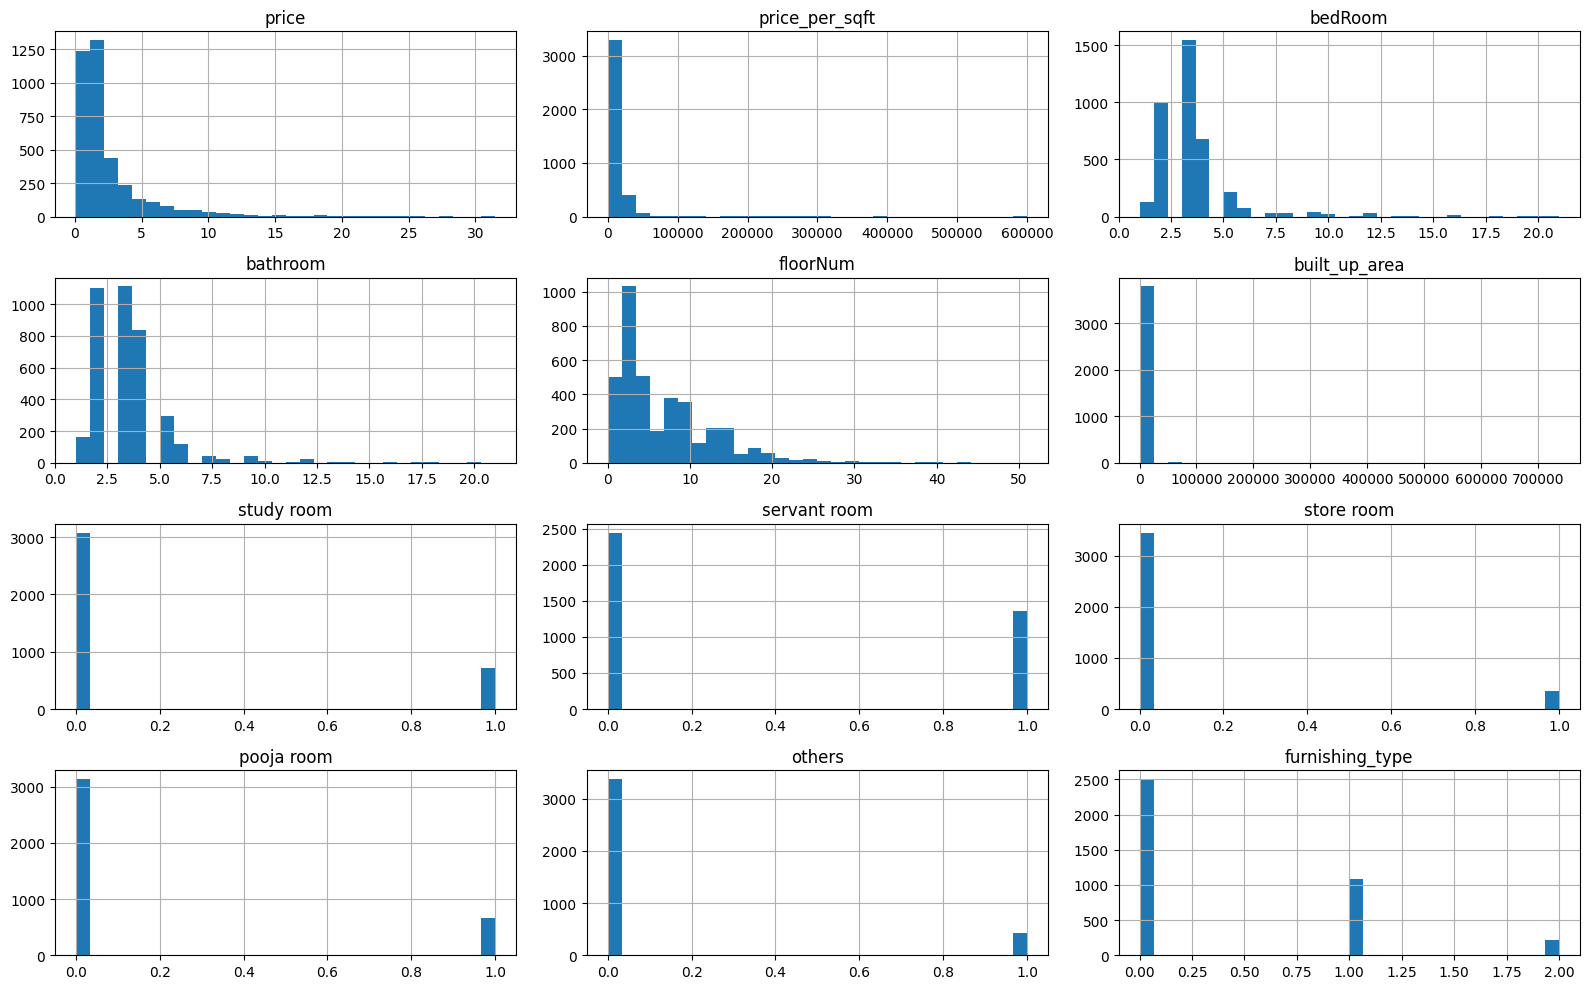

<Figure size 800x600 with 0 Axes>

             price  price_per_sqft      bedRoom     bathroom     floorNum  \
count  3799.000000     3799.000000  3799.000000  3799.000000  3796.000000   
mean      2.511025    13877.796536     3.336931     3.404317     6.793862   
std       2.965634    23054.014000     1.875027     1.928895     6.023361   
min       0.070000        4.000000     1.000000     1.000000     0.000000   
25%       0.940000     6812.500000     2.000000     2.000000     2.000000   
50%       1.500000     9016.000000     3.000000     3.000000     5.000000   
75%       2.700000    13872.500000     4.000000     4.000000    10.000000   
max      31.500000   600000.000000    21.000000    21.000000    51.000000   

       built_up_area   study room  servant room   store room   pooja room  \
count    3799.000000  3799.000000   3799.000000  3799.000000  3799.000000   
mean     2687.362848     0.189524      0.356936     0.090550     0.174520   
std     21706.230752     0.391976      0.479159     0.287006     0.379606  

In [ ]:
#Plotting
df[numerical_cols].hist(figsize=(16, 10), bins=30)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
plt.show()
print(df[numerical_cols].describe())


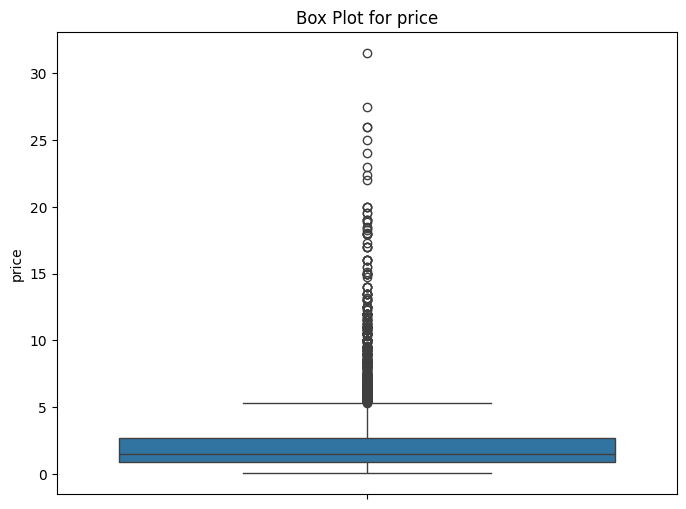

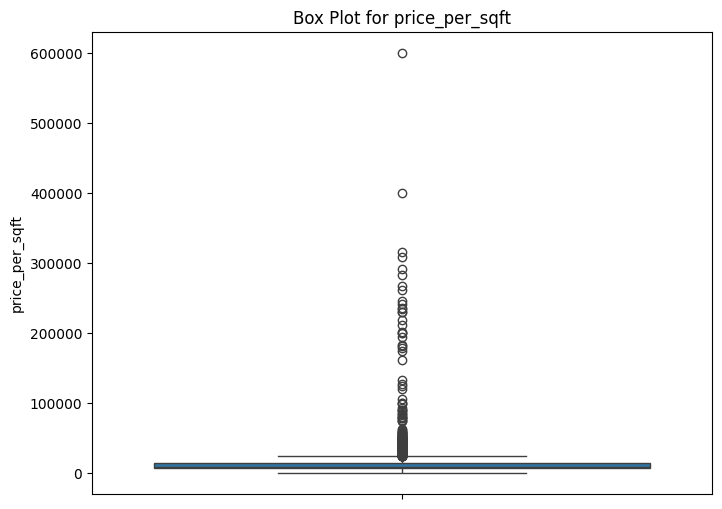

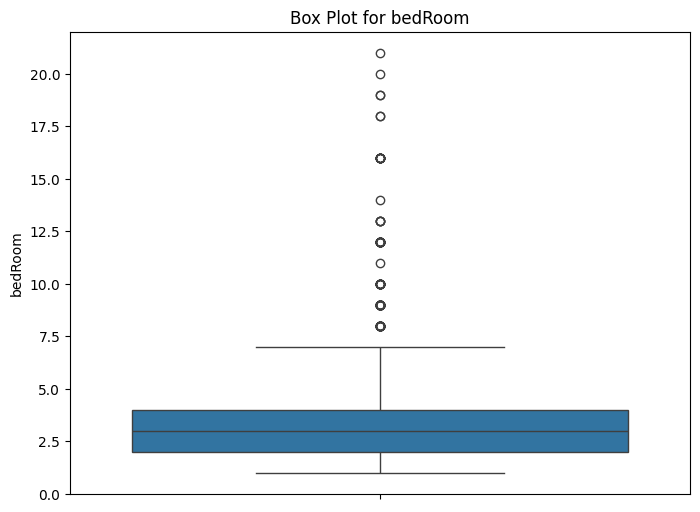

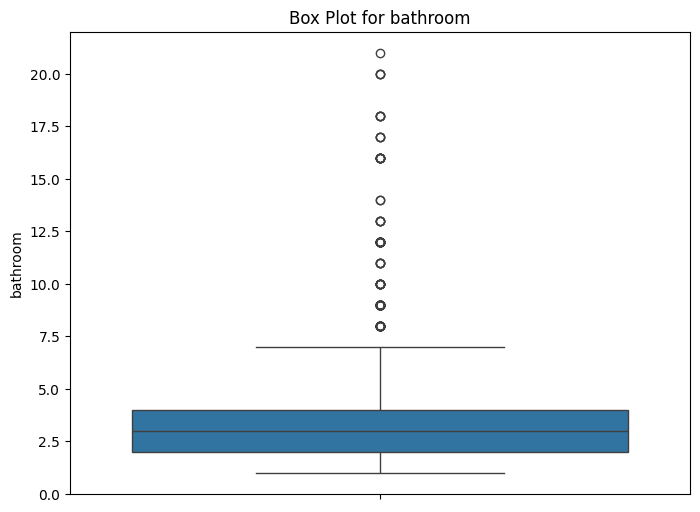

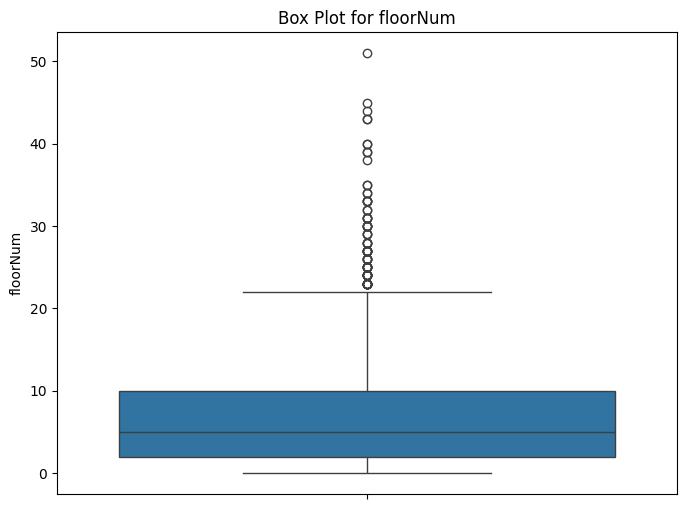

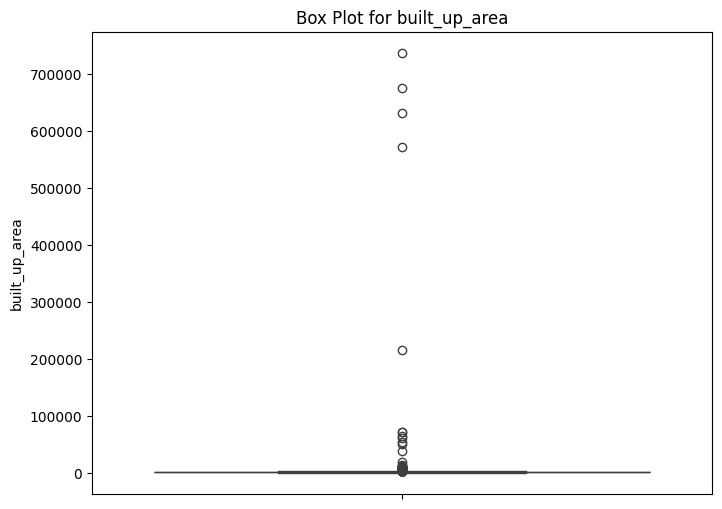

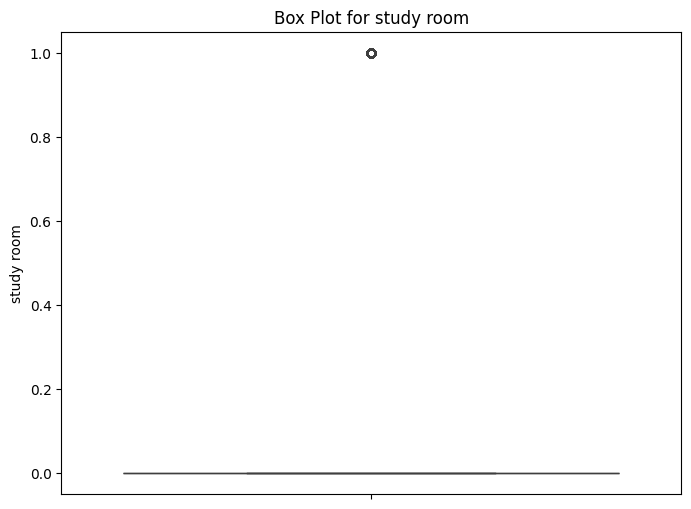

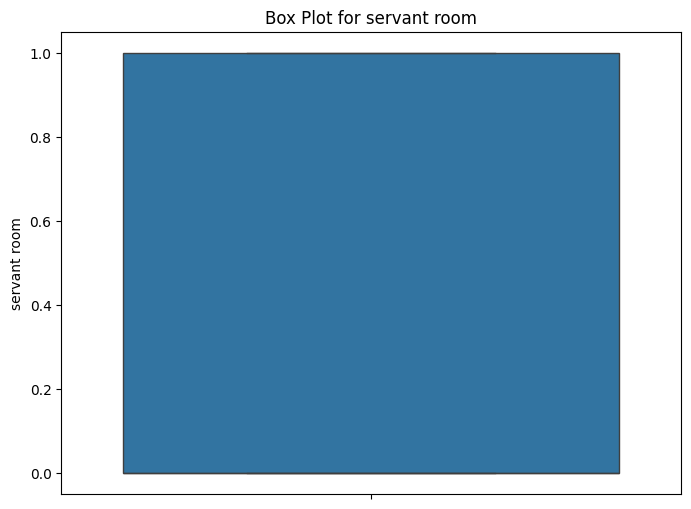

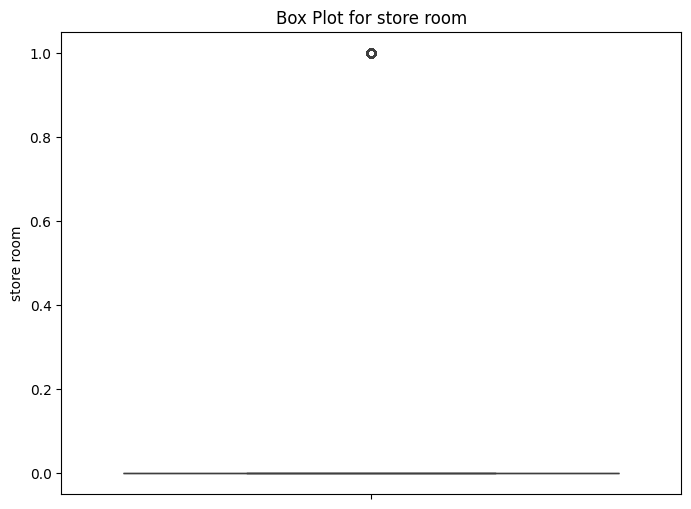

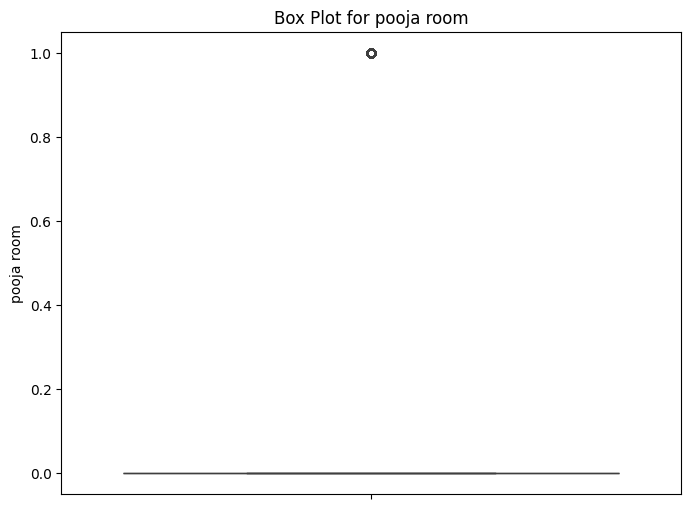

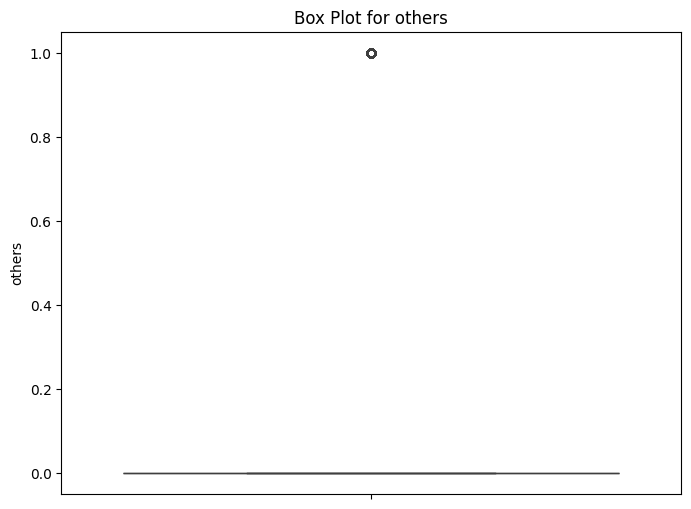

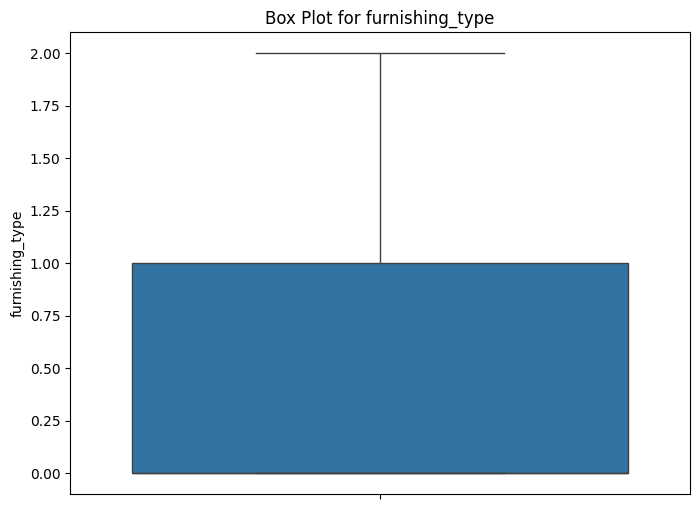

In [ ]:
#Plotting
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

## Task-4: Outliers Handling

## Column: Price

In [ ]:
#We have 89 outliers in this column

#Here we will not use any outlier handling techniques because they are not potential outliers as the are all independent houses with many bedrooms, bathrooms and other rooms and many of them are furnished also.

## Column: Price_Per_Sqft

In [ ]:
#We have 39 outliers in this column
#Based on the boxplot
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
66,house,independent,sector 13,0.50,90909.0,12,4,3,4.0,Old Property,55.0,0,0,0,0,0,0
229,house,rk excelo,sector 12,0.60,120000.0,5,3,2,3.0,Moderately Old,30.0,0,0,0,0,1,0
336,house,independent,sector 28,4.50,125000.0,4,4,0,4.0,Undefined,360.0,0,0,0,0,0,0
342,house,unitech nirvana birch court,sector 50,7.10,283333.0,3,3,3,1.0,Moderately Old,251.0,0,1,0,0,0,0
386,house,cloudnine cottages,sohna road,5.50,55000.0,3,3,0,1.0,Moderately Old,1000.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3386,house,independent,sector 38,8.00,230547.0,10,10,3+,1.0,Undefined,347.0,0,0,0,0,0,0
3449,house,independent,sector 57,8.00,266666.0,5,4,3,2.0,Relatively New,300.0,1,1,0,1,0,0
3519,house,huda plot sector 38,sector 38,4.30,245398.0,13,13,3+,5.0,Relatively New,175.0,0,0,0,0,0,2
3624,house,independent,sector 4,0.67,88157.0,3,3,2,2.0,Relatively New,76.0,0,0,0,0,1,0


In [ ]:
#Removing outliers otherwise
df = df[df['price_per_sqft']<=50000]

## Column: Built_Up_Area

In [ ]:
#We have 7 outliers in this column
#Based on the boxplot
df[df['built_up_area']>200000]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type
1638,flat,signature global solera 2,sector 107,0.51,9.0,2,2,1,3.0,New Property,571551.0,0,0,0,0,0,0
1648,flat,hcbs sports ville,sohna road,0.35,4.0,2,2,2,8.0,Relatively New,737147.0,0,0,0,0,0,2
2111,flat,signature the roselia,sector 95,0.45,7.0,2,2,2,2.0,New Property,632492.0,0,0,0,0,0,0
2651,flat,ramsons kshitij,sector 95,0.31,5.0,2,2,1,1.0,Relatively New,675484.0,1,0,0,0,1,0
3021,house,independent,sector 50,5.00,232.0,6,5,3+,2.0,New Property,215517.0,1,1,0,1,1,1


In [ ]:
#Removing outliers otherwise
df = df[df['built_up_area']<=200000]

## Column: BedRoom, Bathroom, FloorNum, and StoreRoom

In [ ]:
#We have 112 outliers in Bedroom Column
#We have 60 outliers in Bathroom Column
#We have 58 outliers in FloorNum Column
#We have 344 outliers in StoreRoom Column

#There is no need of removing the outliers in this column
#Because these are not potential outliers
#According to the dataframe, bigger houses will have more of these rooms

# Brownie Points: Used Random Forests

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

y_train_pred = rf_model.predict(X_train_imputed)

y_test_pred = rf_model.predict(X_test_imputed)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R-squared score:", train_r2_score)
print("Test R-squared score:", test_r2_score)


Train RMSE: 0.15774741153387517
Test RMSE: 0.28121704716872825
Train R-squared score: 0.9958150022804465
Test R-squared score: 0.9857617064605074
